# Выпускной проект
# Тема: E-commerce — Выявление профилей потребления

# Цель исследования:

**Сегментировать покупателей по профилю потребления.**

# План исследования:

1. Изучить общую информацию.


2. Выполнить предобработку данных.


3. Провести исследовательский анализ данных.


4. Сегментировать покупателей на основе истории их покупок.


5. Сформировать сегменты на основе того, что покупают пользователи. 


6. Проанализировать их покупки и сегментировать товары на основе принадлежности к той или иной товарной категории.


7. Произвести RFM-анализ (метод сегментации клиентов).

    
8. Проверить не менее 2 гипотез.


9. Сделать выводы.


10. По результатам исследования подготовить презентацию.

  

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.express as px
import numpy as np 
from scipy import stats as st
import scipy
import scipy.stats as stats
from itertools import combinations

In [2]:
pd.set_option('display.max_colwidth', None)

## Изучим общую информацию

### Сохраним данные в датафреймы

In [3]:
ecom = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [4]:
def data_frame(x):
    display(x.head(10)) 
    print('*'*50)
    x.info()
    print('*'*50)
    print('Количество дубликатов:', x.duplicated().sum())

In [5]:
data_frame(ecom)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
**************************************************
Количество дубликатов: 0


**Промежуточный вывод на основе изученной общей информации:**
<p></p>

<div style="border:solid green 2px; padding: 10px">

1. Таблица состоит из 7474 записей.
2. Найдено 0 явных дубликатов, неявные изучим ниже .
3. Не найдены пропуски.
4. Есть некорректный тип данных у date.
5. Название столбцов корректны.
   
</div>

### Выполним предобработку данных.

In [6]:
# приведем столбец с датой к формату datetime
ecom['date'] = pd.to_datetime(ecom['date'], format='%Y%m%d%H')

In [7]:
# найдем неявные дубликаты
temp = ecom.copy()
temp[temp[['customer_id', 'order_id','product', 'quantity', 'price']].duplicated(keep=False)]

,date,customer_id,order_id,product,quantity,price
15,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарным покрытием 12 см, LG17085",1,239.0
16,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытием MARBLE ALPENKOK d = 26 см AK-0039A/26N,1,824.0
17,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см AK-26GL,1,262.0
18,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
19,2018-10-01 21:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
...,...,...,...,...,...,...
6716,2019-10-30 07:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6717,2019-10-30 09:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0


In [8]:
# удалим неявные дубликаты
ecom = ecom.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']) 

In [9]:
# Проверим таблицу без дубликатов 
data_frame(ecom)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5610 non-null   datetime64[ns]
 1   customer_id  5610 non-null   object        
 2   order_id     5610 non-null   int64         
 3   product      5610 non-null   object        
 4   quantity     5610 non-null   int64         
 5   price        5610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 306.8+ KB
**************************************************
Количество дубликатов: 0


In [10]:
# найдем неявные дубликаты по заказу и продукту
dup = ecom.copy()
dup[dup[['order_id', 'product']].duplicated(keep=False)]

,date,customer_id,order_id,product,quantity,price
512,2018-10-28 22:00:00,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
538,2018-10-30 21:00:00,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
1152,2018-12-10 11:00:00,bbb32131-2d92-4c1e-aa28-41723f7bc26c,69282,Кружка прозрачная 250 мл H8437 Luminarc Франция,6,44.0
1154,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъярусная,1,164.0
1160,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъярусная,1,164.0
...,...,...,...,...,...,...
6508,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6538,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0
6576,2019-10-10 22:00:00,31a39955-8a93-42f3-8839-04a9693632a7,72778,Шеффлера Голд Капелла d-12 см h-25 см,1,149.0
6601,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилиндрическая без рисунка 1506037,1,974.0


У нас не может на один и тот же заказ быть несколько покупателей, поэтому оставим актуальным последний заказ с покупателем

In [11]:
#удалим заказы, где на один заказ приходится больше одной даты и одного клиента, оставим последний заказ актуальным
ecom = ecom.drop_duplicates(subset=['order_id', 'product'], keep='last')

In [12]:
#количество уникальных клиентов на один заказ
ecom.groupby(['order_id']).agg({'customer_id': ['nunique']})['customer_id'].sort_values(by='nunique', ascending=False).head(1)

,nunique
order_id,
69485,2


In [13]:
ecom[ecom['order_id'] == 69485]

,date,customer_id,order_id,product,quantity,price
1282,2018-12-20 16:00:00,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,Набор столовых приборов 24 предмета SAINT GERMAIN Domenik DM9638,1,1087.0
1384,2018-12-26 23:00:00,e0461045-4fcc-4731-8837-509f6534512a,69485,Набор столовых приборов 24 предмета FARANDOLE Domenik DM9635,1,1274.0


Возможно первый заказ был отменен или в нем была ошибка, поэтому на другого покупателя был оформлен этот же номер заказа.

In [14]:
#количество уникальных дат на один заказ
ecom.groupby(['order_id']).agg({'date': ['nunique']})['date'].sort_values(by='nunique', ascending=False).head(15)

,nunique
order_id,
72517,2
14649,2
69485,2
71426,2
70318,2
14898,2
14500,2
71143,2
70186,2


In [15]:
ecom[ecom['order_id'] == 72517]

,date,customer_id,order_id,product,quantity,price
6258,2019-09-05 14:00:00,51851f8e-e239-4e31-ab2c-4b67ab2c76da,72517,Бальзамин новогвинейский d-13 см лососевый,1,134.0
6263,2019-09-05 22:00:00,51851f8e-e239-4e31-ab2c-4b67ab2c76da,72517,Бальзамин новогвинейский d-13 см ярко красный,1,134.0


In [16]:
ecom[ecom['order_id'] == 71143]

,date,customer_id,order_id,product,quantity,price
2850,2019-04-15 07:00:00,1772d490-ef94-4d83-9bb1-9a12aebbe3ce,71143,Муляж Банан желтый 21 см полиуретан,1,59.0
2948,2019-04-18 15:00:00,1772d490-ef94-4d83-9bb1-9a12aebbe3ce,71143,Муляж Апельсин 8 см полиуретан,1,59.0


In [17]:
ecom[ecom['order_id'] == 69527]

,date,customer_id,order_id,product,quantity,price
1319,2018-12-23 12:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Плед флисовый 200х150 см WELLNESS WPLNY152-Зима_4 100 % полиэстер,1,712.0
1351,2018-12-24 20:00:00,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,Лестница-стремянка Dogrular Ufuk оцинкованная 8-ми ступенчатая,1,1649.0


In [18]:
ecom[ecom['order_id'] == 14500]

,date,customer_id,order_id,product,quantity,price
482,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,"Многолетнее растение Душица-орегано розовый объем 0,5 л",1,89.0
483,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,"Многолетнее растение Тимьян-чабрец розовый объем 0,5 л",1,89.0
484,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см белая полумахровая,1,188.0
485,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см розовая с малиновым полумахровая,1,188.0
486,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см сиреневый полумахровый,1,188.0
487,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Пеларгония зональная диам. 12 см ярко красная махровая,1,188.0
488,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,"Рассада зелени для кухни Базилик Арарат, кассета по 6шт",1,169.0
489,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Рассада зелени для кухни Лаванды в горшке диам. 9 см,1,101.0
490,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,210.0
550,2018-10-31 06:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,Рассада зелени для кухни Розмарина в горшке диам. 9 см,1,101.0


По выше данным, можно сделать предположение, что пользователи через какое-то время просили заменить или поправить заказ у технической поддержки или добавить в заказ дополнительный продукт.

In [19]:
set(ecom['product'].unique())

{'Кружка прозрачная 250 мл H8437 Luminarc Франция',
 'Сумка-тележка хозяйственная Rolser MNB017 fucsia LOGIC DOS+2 фуксия',
 'Цветущее комнатное растение Бегония Элатиор, цвет в ассортименте',
 'Декоративная композиция искуственных цветов Букет Роз три цветка, цвет в ассортименте 105 см',
 'Роза Палас белая d-17 см h-50 см h-20',
 'Коврик для ванной прямоугольный, 4.5см. Shaggy 70х100см голубой, 603001-003',
 'Сушилка для белья Colombo Star 18 3679',
 'Сумка-тележка хозяйственная Rolser Jet Joy серебро, JET016 plata JOY',
 'Завертка форточная белая/антик с полимерным покрытием *Тонар*, 1108287',
 'Скатерть Азалия 88% полиэфир 12% хлопок прямоугольная 350х150 см персиковая Wellness MC355-Азалия*05',
 'Перчатки Latex Free L из латекса с защитой для рук и от аллергии, Leifheit, 40039',
 'Лоток для холодца эмалированный 1,5 л с пластмассовой крышкой с рисунком С-2508Кп/4 Стэма 1506085',
 'Вешалка-стойка Сакура Авангард венге',
 'Вешалка-плечики без эссенции цвет тёмно-розовый FWM/L-Pink',


In [20]:
category = []

# С помощью регулярного выражения выделяем из столбца `product` первые несколько слов до заглавной буквы
for values in ecom['product']:
    category.append(re.search("[А-я][^А-Я0-9,a-zA-Z(d]*", values)[0])

# Добавляем новый столбец в DataFrame
ecom['product_2'] = category

In [21]:
ecom

,date,customer_id,order_id,product,quantity,price,product_2
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное растение в горшке
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,Комнатное растение в горшке
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус
...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,томата
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,Дендробиум
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,Подставка для обуви резиновая
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,Тагетис крупноцветковый рассада однолетних цветов в кассете по


In [22]:
ecom['product_2'] = (
    ecom['product_2']
    .str.replace('ё', 'е')
    .str.rstrip())

In [23]:
set(ecom['product_2'].unique())

{'Автоматическая щетка',
 'Агератум рассада однолетних цветов в кассете по',
 'Адиантум',
 'Азалия',
 'Азалия индика',
 'Аквилегия махровая',
 'Аквилегия обыкновенная',
 'Алиссум',
 'Алиссум рассада однолетних цветов в кассете по',
 'Алоэ',
 'Альбука',
 'Амариллис',
 'Анемона белый объем',
 'Антижир',
 'Антинакипин для утюгов',
 'Антуриум',
 'Антуриум андрианум',
 'Аптения',
 'Арбуз',
 'Аргирантерум рассада однолетних цветов в горшке диам.',
 'Ароматизированное средство дудаления известкового налета и ржавчины',
 'Артемизия',
 'Аспарагус',
 'Астра альпийская микс объем',
 'Астра рассада однолетних цветов в кассете по',
 'Афеляндра скуарроса',
 'Бадан',
 'Базилик',
 'Базилик зеленый',
 'Базилик овощной',
 'Бак для белья',
 'Баклажан',
 'Бакопа ампельная',
 'Бакопа ампельная махровая белая махровая объем',
 'Бакопа ампельная махровая сиреневая махровая объем',
 'Бакопа ампельная махровая фиолетовая махровая объем',
 'Бакопа ампельная мега-крупная белая объем',
 'Бакопа ампельная мега-кру

In [24]:
ecom.loc[ecom['product_2'].str.contains('Азалия', case=False), 'product_2'] = 'Азалия'
ecom.loc[ecom['product_2'].str.contains('Аквилегия', case=False), 'product_2'] = 'Аквилегия'
ecom.loc[ecom['product_2'].str.contains('Алиссум', case=False), 'product_2'] = 'Алиссум'
ecom.loc[ecom['product_2'].str.contains('Агератум', case=False), 'product_2'] = 'Агератум'
ecom.loc[ecom['product_2'].str.contains('Анемона', case=False), 'product_2'] = 'Анемона'
ecom.loc[ecom['product_2'].str.contains('Антинакипин', case=False), 'product_2'] = 'Антинакипин'
ecom.loc[ecom['product_2'].str.contains('Антуриум', case=False), 'product_2'] = 'Антуриум'
ecom.loc[ecom['product_2'].str.contains('Астра', case=False), 'product_2'] = 'Астра'
ecom.loc[ecom['product_2'].str.contains('Афеляндра', case=False), 'product_2'] = 'Афеляндра'
ecom.loc[ecom['product_2'].str.contains('Базилик', case=False), 'product_2'] = 'Базилик'
ecom.loc[ecom['product_2'].str.contains('Бакопа', case=False), 'product_2'] = 'Бакопа'
ecom.loc[ecom['product_2'].str.contains('Бальзамин', case=False), 'product_2'] = 'Бальзамин'
ecom.loc[ecom['product_2'].str.contains('Банка', case=False), 'product_2'] = 'Банка'
ecom.loc[ecom['product_2'].str.contains('Бегония', case=False), 'product_2'] = 'Бегония'
ecom.loc[ecom['product_2'].str.contains('Вантуз', case=False), 'product_2'] = 'Вантуз'
ecom.loc[ecom['product_2'].str.contains('Ведро', case=False), 'product_2'] = 'Ведро'
ecom.loc[ecom['product_2'].str.contains('Веник', case=False), 'product_2'] = 'Веник'
ecom.loc[ecom['product_2'].str.contains('Вербена', case=False), 'product_2'] = 'Вербена'
ecom.loc[ecom['product_2'].str.contains('Весы', case=False), 'product_2'] = 'Весы'
ecom.loc[ecom['product_2'].str.contains('Вешалка', case=False), 'product_2'] = 'Вешалка'
ecom.loc[ecom['product_2'].str.contains('Виола', case=False), 'product_2'] = 'Виола'
ecom.loc[ecom['product_2'].str.contains('Гвоздика', case=False), 'product_2'] = 'Гвоздика'
ecom.loc[ecom['product_2'].str.contains('Гербера', case=False), 'product_2'] = 'Гербера'
ecom.loc[ecom['product_2'].str.contains('Гладильная доска', case=False), 'product_2'] = 'Гладильная доска'
ecom.loc[ecom['product_2'].str.contains('Гортензия', case=False), 'product_2'] = 'Гортензия'
ecom.loc[ecom['product_2'].str.contains('скатерть', case=False), 'product_2'] = 'Cкатерть'
ecom.loc[ecom['product_2'].str.contains('Губка', case=False), 'product_2'] = 'Губка'
ecom.loc[ecom['product_2'].str.contains('Емкость', case=False), 'product_2'] = 'Емкость'
ecom.loc[ecom['product_2'].str.contains('Земляника', case=False), 'product_2'] = 'Земляника'
ecom.loc[ecom['product_2'].str.contains('Измерительный угольник', case=False), 'product_2'] = 'Измерительный угольник'
ecom.loc[ecom['product_2'].str.contains('Искусственная композиция из цветов', case=False), 'product_2'] = 'Искусственная композиция из цветов'
ecom.loc[ecom['product_2'].str.contains('Искусственный цветок', case=False), 'product_2'] = 'Искусственный цветок'
ecom.loc[ecom['product_2'].str.contains('Каланхое каландива', case=False), 'product_2'] = 'Каланхое каландива'
ecom.loc[ecom['product_2'].str.contains('Калибрахоа', case=False), 'product_2'] = 'Калибрахоа'
ecom.loc[ecom['product_2'].str.contains('Калла', case=False), 'product_2'] = 'Калла'
ecom.loc[ecom['product_2'].str.contains('Камнеломка', case=False), 'product_2'] = 'Камнеломка'
ecom.loc[ecom['product_2'].str.contains('Капуста', case=False), 'product_2'] = 'Капуста'
ecom.loc[ecom['product_2'].str.contains('Карниз', case=False), 'product_2'] = 'Карниз'
ecom.loc[ecom['product_2'].str.contains('Кастрюля', case=False), 'product_2'] = 'Кастрюля'
ecom.loc[ecom['product_2'].str.contains('Кисточка', case=False), 'product_2'] = 'Кисточка'
ecom.loc[ecom['product_2'].str.contains('Ковер', case=False), 'product_2'] = 'Ковер'
ecom.loc[ecom['product_2'].str.contains('Коврик', case=False), 'product_2'] = 'Коврик'
ecom.loc[ecom['product_2'].str.contains('Колокольчик', case=False), 'product_2'] = 'Колокольчик'
ecom.loc[ecom['product_2'].str.contains('Комнатное растение', case=False), 'product_2'] = 'Комнатное растение'
ecom.loc[ecom['product_2'].str.contains('Контейнер', case=False), 'product_2'] = 'Контейнер'
ecom.loc[ecom['product_2'].str.contains('Корзина', case=False), 'product_2'] = 'Корзина'
ecom.loc[ecom['product_2'].str.contains('Кориандр', case=False), 'product_2'] = 'Кориандр'
ecom.loc[ecom['product_2'].str.contains('Коробка', case=False), 'product_2'] = 'Коробка'
ecom.loc[ecom['product_2'].str.contains('Кофр', case=False), 'product_2'] = 'Кофр'
ecom.loc[ecom['product_2'].str.contains('Крассула', case=False), 'product_2'] = 'Крассула'
ecom.loc[ecom['product_2'].str.contains('Крепеж', case=False), 'product_2'] = 'Крепеж'
ecom.loc[ecom['product_2'].str.contains('Кружка', case=False), 'product_2'] = 'Кружка'
ecom.loc[ecom['product_2'].str.contains('Крючок', case=False), 'product_2'] = 'Крючок'
ecom.loc[ecom['product_2'].str.contains('Кувшин', case=False), 'product_2'] = 'Кувшин'
ecom.loc[ecom['product_2'].str.contains('Лаванда', case=False), 'product_2'] = 'Лаванда'
ecom.loc[ecom['product_2'].str.contains('Лавр', case=False), 'product_2'] = 'Лавр'
ecom.loc[ecom['product_2'].str.contains('Лантана', case=False), 'product_2'] = 'Лантана'
ecom.loc[ecom['product_2'].str.contains('Лапчатка', case=False), 'product_2'] = 'Лапчатка'
ecom.loc[ecom['product_2'].str.contains('Лестница', case=False), 'product_2'] = 'Лестница'
ecom.loc[ecom['product_2'].str.contains('Лобелия', case=False), 'product_2'] = 'Лобелия'
ecom.loc[ecom['product_2'].str.contains('Львиный зев', case=False), 'product_2'] = 'Львиный зев'
ecom.loc[ecom['product_2'].str.contains('Мантоварка', case=False), 'product_2'] = 'Мантоварка'
ecom.loc[ecom['product_2'].str.contains('Миксер', case=False), 'product_2'] = 'Миксер'
ecom.loc[ecom['product_2'].str.contains('Миска', case=False), 'product_2'] = 'Миска'
ecom.loc[ecom['product_2'].str.contains('Молодило', case=False), 'product_2'] = 'Молодило'
ecom.loc[ecom['product_2'].str.contains('Монарда', case=False), 'product_2'] = 'Монарда'
ecom.loc[ecom['product_2'].str.contains('Муляж', case=False), 'product_2'] = 'Муляж'
ecom.loc[ecom['product_2'].str.contains('Мусорный контейнер', case=False), 'product_2'] = 'Мусорный контейнер'
ecom.loc[ecom['product_2'].str.contains('Мыло', case=False), 'product_2'] = 'Мыло'
ecom.loc[ecom['product_2'].str.contains('Мята', case=False), 'product_2'] = 'Мята'
ecom.loc[ecom['product_2'].str.contains('Набор бокалов', case=False), 'product_2'] = 'Набор бокалов'
ecom.loc[ecom['product_2'].str.contains('Набор вешалок', case=False), 'product_2'] = 'Набор вешалок'
ecom.loc[ecom['product_2'].str.contains('Набор стаканов', case=False), 'product_2'] = 'Набор стаканов'
ecom.loc[ecom['product_2'].str.contains('Набор фужеров', case=False), 'product_2'] = 'Набор фужеров'
ecom['product_2'] = (ecom['product_2'].replace('Наматрасник', 'Наматрацник'))
ecom.loc[ecom['product_2'].str.contains('Наматрицник', case=False), 'product_2'] = 'Наматрацник'
ecom.loc[ecom['product_2'].str.contains('Нож', case=False), 'product_2'] = 'Нож'
ecom.loc[ecom['product_2'].str.contains('Окномойка', case=False), 'product_2'] = 'Окномойка'
ecom.loc[ecom['product_2'].str.contains('Пеларгония', case=False), 'product_2'] = 'Пеларгония'
ecom.loc[ecom['product_2'].str.contains('Перчатки', case=False), 'product_2'] = 'Перчатки'
ecom.loc[ecom['product_2'].str.contains('Петля', case=False), 'product_2'] = 'Петля'
ecom.loc[ecom['product_2'].str.contains('Петрушка', case=False), 'product_2'] = 'Петрушка'
ecom.loc[ecom['product_2'].str.contains('Петуния', case=False), 'product_2'] = 'Петуния'
ecom.loc[ecom['product_2'].str.contains('Подголовник', case=False), 'product_2'] = 'Подголовник'    
ecom.loc[ecom['product_2'].str.contains('Подрукавник', case=False), 'product_2'] = 'Подрукавник'
ecom.loc[ecom['product_2'].str.contains('Подставка', case=False), 'product_2'] = 'Подставка'    
ecom.loc[ecom['product_2'].str.contains('Подушка', case=False), 'product_2'] = 'Подушка'
ecom.loc[ecom['product_2'].str.contains('Покрывало', case=False), 'product_2'] = 'Покрывало'
ecom.loc[ecom['product_2'].str.contains('Полотенце', case=False), 'product_2'] = 'Полотенце'
ecom.loc[ecom['product_2'].str.contains('Примула', case=False), 'product_2'] = 'Примула'  
ecom.loc[ecom['product_2'].str.contains('Пробка', case=False), 'product_2'] = 'Пробка'
ecom.loc[ecom['product_2'].str.contains('Простыня', case=False), 'product_2'] = 'Простыня' 
ecom.loc[ecom['product_2'].str.contains('Пуансетия', case=False), 'product_2'] = 'Пуансетия' 
ecom.loc[ecom['product_2'].str.contains('Пуансеттия', case=False), 'product_2'] = 'Пуансетия' 
ecom.loc[ecom['product_2'].str.contains('Рассада', case=False), 'product_2'] = 'Рассада' 
ecom.loc[ecom['product_2'].str.contains('Роза', case=False), 'product_2'] = 'Роза' 
ecom.loc[ecom['product_2'].str.contains('Розмарин', case=False), 'product_2'] = 'Розмарин'
ecom.loc[ecom['product_2'].str.contains('Рыбочистка', case=False), 'product_2'] = 'Рыбочистка' 
ecom.loc[ecom['product_2'].str.contains('Салфетка', case=False), 'product_2'] = 'Салфетка' 
ecom.loc[ecom['product_2'].str.contains('Сверло', case=False), 'product_2'] = 'Сверло' 
ecom.loc[ecom['product_2'].str.contains('Скатерть', case=False), 'product_2'] = 'Скатерть'
ecom.loc[ecom['product_2'].str.contains('Сковорода', case=False), 'product_2'] = 'Сковорода'
ecom.loc[ecom['product_2'].str.contains('Скребок', case=False), 'product_2'] = 'Скребок'
ecom.loc[ecom['product_2'].str.contains('Совок', case=False), 'product_2'] = 'Совок'
ecom.loc[ecom['product_2'].str.contains('Соковарка', case=False), 'product_2'] = 'Соковарка'
ecom.loc[ecom['product_2'].str.contains('Средство для мытья', case=False), 'product_2'] = 'Средство для мытья'
ecom.loc[ecom['product_2'].str.contains('Стеллаж', case=False), 'product_2'] = 'Стеллаж'
ecom.loc[ecom['product_2'].str.contains('Стремянка', case=False), 'product_2'] = 'Стремянка'
ecom.loc[ecom['product_2'].str.contains('Стремянки', case=False), 'product_2'] = 'Стремянка'
ecom.loc[ecom['product_2'].str.contains('Тележк', case=False), 'product_2'] = 'Тележка'
ecom.loc[ecom['product_2'].str.contains('Сушилка', case=False), 'product_2'] = 'Сушилка'
ecom.loc[ecom['product_2'].str.contains('Табак', case=False), 'product_2'] = 'Табак'
ecom.loc[ecom['product_2'].str.contains('Тарелка', case=False), 'product_2'] = 'Тарелка'
ecom.loc[ecom['product_2'].str.contains('Терка', case=False), 'product_2'] = 'Терка'
ecom.loc[ecom['product_2'].str.contains('Термокружка', case=False), 'product_2'] = 'Термокружка'
ecom.loc[ecom['product_2'].str.contains('Термометр', case=False), 'product_2'] = 'Термометр'
ecom.loc[ecom['product_2'].str.contains('Термос', case=False), 'product_2'] = 'Термос'
ecom.loc[ecom['product_2'].str.contains('Тимьян', case=False), 'product_2'] = 'Тимьян'
ecom.loc[ecom['product_2'].str.contains('Ткань', case=False), 'product_2'] = 'Ткань'
ecom.loc[ecom['product_2'].str.contains('Толкушка', case=False), 'product_2'] = 'Толкушка'
ecom.loc[ecom['product_2'].str.contains('Томат', case=False), 'product_2'] = 'Томат'
ecom.loc[ecom['product_2'].str.contains('Урна', case=False), 'product_2'] = 'Урна'
ecom.loc[ecom['product_2'].str.contains('Утюг', case=False), 'product_2'] = 'Утюг'
ecom.loc[ecom['product_2'].str.contains('Фаленопсис', case=False), 'product_2'] = 'Фаленопсис'
ecom.loc[ecom['product_2'].str.contains('Фатсия', case=False), 'product_2'] = 'Фатсия'
ecom.loc[ecom['product_2'].str.contains('Фиалка', case=False), 'product_2'] = 'Фиалка'
ecom.loc[ecom['product_2'].str.contains('Флокс', case=False), 'product_2'] = 'Флокс'
ecom.loc[ecom['product_2'].str.contains('Форма', case=False), 'product_2'] = 'Форма'
ecom.loc[ecom['product_2'].str.contains('Фуксия', case=False), 'product_2'] = 'Фуксия'
ecom.loc[ecom['product_2'].str.contains('Хлебница', case=False), 'product_2'] = 'Хлебница'
ecom.loc[ecom['product_2'].str.contains('Хризантема', case=False), 'product_2'] = 'Хризантема'
ecom.loc[ecom['product_2'].str.contains('Цикламен', case=False), 'product_2'] = 'Цикламен'
ecom.loc[ecom['product_2'].str.contains('Цинерария', case=False), 'product_2'] = 'Цинерария'
ecom.loc[ecom['product_2'].str.contains('Цинния', case=False), 'product_2'] = 'Цинния'
ecom.loc[ecom['product_2'].str.contains('Циния', case=False), 'product_2'] = 'Цинния'
ecom.loc[ecom['product_2'].str.contains('Чайник', case=False), 'product_2'] = 'Чайник'
ecom.loc[ecom['product_2'].str.contains('Чехол', case=False), 'product_2'] = 'Чехол'
ecom.loc[ecom['product_2'].str.contains('Швабра', case=False), 'product_2'] = 'Швабра'
ecom.loc[ecom['product_2'].str.contains('Шнур', case=False), 'product_2'] = 'Шнур'
ecom.loc[ecom['product_2'].str.contains('Штора', case=False), 'product_2'] = 'Штора'
ecom.loc[ecom['product_2'].str.contains('Щетка', case=False), 'product_2'] = 'Щетка'
ecom.loc[ecom['product_2'].str.contains('Этажерка', case=False), 'product_2'] = 'Этажерка'
ecom.loc[ecom['product_2'].str.contains('Ящик почтовый', case=False), 'product_2'] = 'Ящик почтовый'
ecom.loc[ecom['product_2'].str.contains('рш', case=False), 'product_2'] = 'Ерш'
ecom.loc[ecom['product_2'].str.contains('Насадка', case=False), 'product_2'] = 'Насадка'
ecom.loc[ecom['product_2'].str.contains('Ароматизированное средство', case=False), 'product_2'] = 'Ароматизированное средство'
ecom.loc[ecom['product_2'].str.contains('Измерительный алюминиевый', case=False), 'product_2'] = 'Измерительный угольник'
ecom.loc[ecom['product_2'].str.contains('Седум', case=False), 'product_2'] = 'Седум'
ecom.loc[ecom['product_2'].str.contains('Таз', case=False), 'product_2'] = 'Таз'

In [25]:
set(ecom['product_2'].unique())

{'Cкатерть',
 'Агератум',
 'Адиантум',
 'Азалия',
 'Аквилегия',
 'Алиссум',
 'Алоэ',
 'Альбука',
 'Амариллис',
 'Анемона',
 'Антижир',
 'Антинакипин',
 'Антуриум',
 'Аптения',
 'Арбуз',
 'Ароматизированное средство',
 'Артемизия',
 'Аспарагус',
 'Астра',
 'Афеляндра',
 'Бадан',
 'Базилик',
 'Бак для белья',
 'Баклажан',
 'Бакопа',
 'Бальзам для мытья посуды',
 'Бальзамин',
 'Банка',
 'Барвинок синий объем',
 'Бархатцы',
 'Бегония',
 'Бельевые прищепки',
 'Бензин для зажигалок',
 'Бидон пластмассовый',
 'Блюдо',
 'Блюдце',
 'Буддлея',
 'Бузульник',
 'Бульонница',
 'Ваза',
 'Вакуумный пакет',
 'Валериана лекарственная',
 'Ванна',
 'Вантуз',
 'Ведро',
 'Веник',
 'Венчик с деревянной ручкой',
 'Вербейник монетчатый желты',
 'Вербена',
 'Веревка полипропиленовая',
 'Вероника колосковая микс объем',
 'Весы',
 'Вешалка',
 'Вешалки мягкие для деликатных вещей',
 'Вигна',
 'Вилка столовая',
 'Виола',
 'Вкладыши для хранения посуды',
 'Гайлардия крупноцветковая желто-красный объем',
 'Гардения',

In [26]:
#количество уникальных продуктов после обработки
ecom['product_2'].nunique()

437

In [27]:
categories = {
    "Товары для сада": ['Агератум', 'Адиантум', 'Азалия','Аквилегия','Алиссум', 'Алоэ', 'Альбука','Амариллис', 'Анемона',
                'Антуриум', 'Аптения', 'Артемизия', 'Аспарагус', 'Астра', 'Афеляндра', 'Бадан', 'Базилик','Бакопа', 
                 'Бальзамин', 'Барвинок синий объем', 'Бархатцы', 'Бегония', 'Буддлея', 'Бузульник', 'Валериана лекарственная',
                'Вербейник монетчатый желты','Вербена', 'Вероника колосковая микс объем', 'Вигна' , 'Виола',
                'Гайлардия крупноцветковая желто-красный объем','Гардения', 'Гвоздика', 'Георгина', 'Герань домашняя',
                'Герань домашняя', 'Гербера', 'Гиацинт','Гимнокалициум', 'Гимнокалициум', 'Гиностемма укорененный черенок',
                'Гипсофила', 'Глоксиния', 'Годеция', 'Гортензия', 'Дендробиум','Джункус', 'Диффенбахия', 'Драцена фрагранс',
                'Душица обыкновенная', 'Ель канадская', 'Замиокулькас', 'Зверобой продырявленный', 'Змееголовник молдавский',
                'Импатиенс', 'Иссоп лекарственный', 'Каланхое каландива', 'Калатея', 'Календула', 'Калибрахоа', 'Калла',
                'Каллуна', 'Калоцефалус', 'Камнеломка', 'Кампанула махровая двухцветная', 'Капсикум', 'Кипарисовик лавсона',
                'Клен ложноплатановый', 'Кодонанта укорененный черенок', 'Колокольчик', 'Комнатное растение', 'Кореопсис',
                'Кориандр', 'Космея', 'Котовник', 'Кофе', 'Крассула', 'Крокусы','Лаванда', 'Лаватера', 'Лавр', 'Лантана',
                'Лапчатка', 'Лен', 'Лилейник высокорослый смесь окрасок объем', 'Литопс', 'Лобелия', 'Львиный зев', 'Любисток',
                'Маттиола', 'Мединилла', 'Мелисса лекарственная', 'Мимоза стыдливая', 'Мирт', 'Многолетнее растение',
                'Молодило', 'Монарда', 'Муррайя', 'Мускари', 'Мята', 'Настурция', 'Незабудка смесь', 'Нефролепис','Нивянник',
                'Новогоднее дерево', 'Нолина в цветной керамике', 'Овсянница сизая серый объем', 'Однолетнее растение',
                'Осина обыкновенная', 'Папоротник страусник зеленый объем', 'Патиссон', 'Пахира', 'Пеларгония', 'Пеперомия',
                'Петрушка', 'Петуния', 'Пиретрум', 'Платикодон махровый синий объем', 'Подсолнечник низкорослый','Примула',
                 'Пряные травы микс', 'Пуансетия', 'Радермахера', 'Ранункулус', 'Рассада', 'Роза', 'Розмарин', 'Рудбекия',
                 'Салат', 'Сантолина', 'Седум', 'Сельдерей листовой', 'Синнингия', 'Скиммия японская', 'Смолевка', 'Соланум', 
                 'Солидаго желтый объем', 'Спатифиллум', 'Суккулент', 'Сциндапсус в ассортименте', 'Табак', 'Тимьян', 'Тюльпан',
                 'Фаленопсис', 'Фатсия', 'Фиалка', 'Физостегия', 'Фикус каучуконосный', 'Фиттония', 'Флокс', 'Фуксия',
                 'Хамедорея','Хлорофитум', 'Хоста микс объем', 'Хризантема', 'Хризолидокарпус', 'Цикламен', 'Цинерария',
                 'Цинния', 'Циперус', 'Цитрофортунелла', 'Чабер','Шеффлера', 'Эвкалипт', 'Энотера', 'Эпипремнум', 'Эхеверия',
                 'Эхинацея микс объем','Эхинокактус', 'Эшшольция', 'Юкка нитчатая', 'Ясколка'],
    "Кухня": ['Cкатерть','Блюдо', 'Блюдце', 'Бульонница', 'Венчик с деревянной ручкой',  'Вилка столовая',
              'Вкладыши для хранения посуды', 'Доска разделочная', 'Измельчитель овощей ручной',
             'Картофелемялка металлическая круглая с деревянной ручкой', 'Кастрюля', 'Кипятильник электрический',
              'Концентрат для мытья посуды', 'Кружка', 'Крышка оцинкованная для стерилизации банок', 'Ложка кухонная',
              'Ложка столовая', 'Ложка чайная', 'Лоток', 'Лоток для холодца эмалированный','Мантоварка', 'Масленка', 
             'Мерный стакан пластиков', 'Миксер', 'Набор бокалов', 'Набор кружек для пива', 'Набор кухонных полотенец',
             'Набор махровых салфеток', 'Набор посуды из нержавеющей стали', 'Набор стаканов', 'Набор столовых приборов',
             'Набор форм для кексов', 'Набор фужеров', 'Набор эмалированных салатников', 'Овощеварка алюминиевая',
              'Овощечистка с плавающим лезвием', 'Орехоколка', 'Отделитель косточек от вишен', 'Половник', 'Пресс для чеснока',
              'Просеиватель для муки', 'Противень прямоугольный алюминиевый', 'Разделочная доска', 
              'Рассекатель пламени на газовую плиту с ручкой', 'Рыбочистка','Салатник', 'Салфетка', 'Салфетница металлическая',
              'Сахарница фарфоровая', 'Сито', 'Скалка силиконовая','Сковорода', 'Скребок', 'Соковарка',
              'Соковыжималка для цитрусовых','Сотейник алюминиевый с керамическим покрытием', 'Стакан низкий',
              'Стакан пластмассовый', 'Стеклянная крышка для сковороды', 'Столовая ложка','Тарелка', 'Терка', 'Термос',
              'Толкушка', 'Тортница', 'Хлебница', 'Чайная ложка', 'Чайник', 'Чайный набор', 'Шприц кондитерский', 
              'Электроштопор'],
    "Товар для дома": ['Банка', 'Бельевые прищепки', 'Бидон пластмассовый', 'Ваза', 'Вакуумный пакет',
                       'Ведро','Веник', 'Веревка полипропиленовая', 'Весы','Вешалка', 'Гладильная доска',
                      'Губка', 'Двуспальное постельное белье', 'Доска гладильная', 'Вешалки мягкие для деликатных вещей',
                       'Емкость', 'Ерш', 'Карниз', 'Ключница', 'Ковер', 'Коврик', 'Ковш пластмассовый',  'Комод', 
                       'Комплект для мытья полов из нержавеющей стали и пластика', 'Комплект махровых полотенец', 
                       'Комплект махровых салфеток', 'Комплект постельного белья','Контейнер', 'Корзина', 'Корзинка с крышкой',
                       'Коробка', 'Корыто оцинкованное', 'Котел алюминиевый', 'Кофр', 'Крючок', 'Кувшин', 'Лестница',
                       'Ложка обувная металлическая крашенная', 'Лопатка', 'Махровый халат женский размер',
                       'Мешок для деликатной стирки','Миска', 'Набор', 'Набор вешалок','Набор для пикника', 
                       'Набор прищепок большие пластиковые', 'Наволочка', 'Наматрацник','Насадка', 'Нетканые салфетки в рулоне', 
                       'Нож', 'Обувница-', 'Одеяло',  'Окномойка', 'Отжим для ведра синий', 'Перчатки', 'Плед флисовый', 
                       'Плечики пластмассовые', 'Подарочный набор на', 'Подвесное кашпо', 'Подголовник', 'Пододеяльник', 
                       'Подрукавник','Подставка', 'Сумка-Тележка','Подушка', 'Покрывало', 'Покрытие для гладильной доски',
                       'Полка для обуви', 'Полки', 'Полотенце', 'Прищепки для белья', 'Пробка', 'Простынь вафельная', 'Простыня','Пылесос',
                       'Пьезозажигалка с мультиискрой на батарейке', 'Решетка вентиляционная металлическая золото',
                       'Ролик для чистки одежды *', 'Рукав для гладильной доски', 'Светильник настольный', 'Сетка для глажения',
                        'Складной детский пуф', 'Сменный блок для ролика','Сметка с совком', 'Совок',  'Стеллаж',  'Сумка', 'Сушилка', 
                       'Таз', 'Тележка', 'Термометр', 'Ткань', 'Тряпка для кафеля и паркета микрофибра макси',  'Урна', 'Утюг', 
                       'Фен дорожный', 'Форма', 'Фоторамка', 'Халат вафельный', 'Чехол', 'Швабра','Штора', 'Щетка', 'Этажерка', 
                       'Ящик для хранения', 'Ящик почтовый', 'Сиденье для гладильной доски', 'Тележка', 
                      'Сумка хозяйственная на колесах'],
    "Ванна": ['Бак для белья', 'Ванна', 'Вантуз', 'Держатель для туалетной бумаги', 'Дозатор для мыла', 'Кольца для штор',
              'Комплект для ванной и туалета', 'Мыльница пластмассовая на ванну',  'Набор ковров для ванной комнаты','Сиденье для унитаза',
              'Сетка для стирки белья на','Стакан для ванной комнаты','Тряпкодержатель с металлическим креплением', 'Штанга для ванной',
              'Сиденье в ванну раздвижное', 'Сиденье для ванны пластмассовое'],
    "Бытовые средства": ['Антижир', 'Антинакипин', 'Ароматизированное средство', 'Бальзам для мытья посуды' , 
                         'Бензин для зажигалок', 'Гипоаллергенный концентрированный гель для стирки белья',
                        'Защитная соль для посудомоечных машин', 'Зубная паста', 'Кондиционер для белья', 'Мыло',
                        'Ополаскиватель для посудомоечных машин', 'Отбеливатель', 'Паста зубная для профилактики заболеваний десен',
                        'Пена для ванн', 'Средство для быстрого удаления жировых загрязнений', 'Средство для мытья',
                         'Средство для удаления известкового налета с поверхностей сантехнических приборов', 'Увлажняющая маска',
                         'Средство против засоров в системах водопровода', 'Стиральный биопорошок',
                         'Универсальное средство на основе хлора ддля чистки сантехники и других поверхностей', 
                        'Чистящий крем для трудновыводимых пятен'],
    "Овощи и фрукты": ['Арбуз', 'Баклажан', 'Горох', 'Девичий виноград пятилисточковый', 'Дыня', 'Земляника', 'Кабачок',
                      'Капуста', 'Клубника', 'Лук порей', 'Морковь', 'Огурец', 'Томат', 'Тыква крупноплодная', 'Укроп',
                      'Шалфей овощной'],
    "Искусственный": ['Декоративная композиция искуственных цветов', 'Искусственная композиция из цветов', 'Искусственная лиана',
                      'Искусственный лист', 'Искусственный цветок', 'Муляж', 'Цветок искусственный'], 
    "Строительство": ['Завертка форточная белая/антик с полимерным покрытием *', 'Измерительный угольник', 'Кисточка', 'Крепеж',
                     'Линейка', 'Мешок для строительного мусора', 'Многофункциональный инструмент', 
                      'Набор инструментов в алюминиевом кейсе на колесиках с ручкой', 
                      'Набор прецизионных напильников с двухкомпонентной ручкой', 'Набор сверел по дереву из',
                     'Основание для пробки электрический', 'Паста для полировки "', 'Петля', 'Пружина дверная', 'Ручка-скоба',
                      'Сверло','Стяжка оконная с болтом', 'Стяжки для чехла гладильной доски', 'Стремянка', 'Уголок оконный',
                      'Фал капроновый', 'Фиксатор-шар хром большой', 'Холодная сварка', 
                      'Шило с пластмассовой ручкой утолщенное с крючком', 'Шнур', 'Шпагат полипропиленовый', 'Шпингалет',
                      'Штангенциркуль', 'Ручка мебельная кольцо овальное хром']
}

def get_category(product):
    for category, items in categories.items():
        if product in items:
            return category
    return "прочее"

# Применение функции get_category к DataFrame
ecom['category'] = ecom['product_2'].apply(get_category) 

In [28]:
ecom

,date,customer_id,order_id,product,quantity,price,product_2,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное растение,Товары для сада
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,Комнатное растение,Товары для сада
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,Товары для сада
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,Товары для сада
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,Товары для сада
...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,Томат,Овощи и фрукты
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,Дендробиум,Товары для сада
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,Подставка,Товар для дома
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,Рассада,Товары для сада


In [29]:
ecom.query('category == "прочее"')

,date,customer_id,order_id,product,quantity,price,product_2,category


<p></p>

<div style="border:solid green 2px; padding: 10px">
    
**Вывод:**
1. Провели анализ данных.
2. Удалили неявные дубликаты. 
3. Поменяли тип данных у date.
4. Добавили столбец category.
    
</div>   

### Произведем исследовательский анализ данных.


In [30]:
#Найдем дату начала и конец наших данных
start_date = min(ecom['date'])
end_date = max(ecom['date'])
print('Дата начала:', start_date,'Дата окончания данных:', end_date )

Дата начала: 2018-10-01 00:00:00 Дата окончания данных: 2020-01-31 15:00:00


#### Топ - 10 товаров по прайсу

In [31]:
ecom.sort_values(by='price', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,product_2,category
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0,Сушилка,Товар для дома
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,"Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90",1,8737.0,Тележка,Товар для дома
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,"Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90",1,8437.0,Тележка,Товар для дома
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,1,8077.0,Тележка,Товар для дома
7436,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,1,8077.0,Тележка,Товар для дома
6629,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 см алюминиевая с лотком для инструментов,1,7724.0,Стремянка,Строительство
7190,2019-12-31 10:00:00,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,107812,Сумка-тележка хозяйственная Rolser IMX006 bassi Logic Tour бордовая,2,7679.0,Тележка,Товар для дома
5994,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucsia LOGIC DOS+2 фуксия,1,7679.0,Тележка,Товар для дома
2339,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bassi Logic Tour бордовая,1,7679.0,Тележка,Товар для дома
654,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malva RD6 сиреневая,1,7597.0,Тележка,Товар для дома


**Вывод:** 
Самый дорогой товар это сушилка уличная - 14917 р.
После сумка-тележка - 8737 р. 
В топ 10 по прайсу входят товары для дома и для строительства (тележки и стремянка).

#### Топ - 10 покупателей по выручке

In [32]:
# Добавим столбец с выручкой
ecom['revenue'] = ecom['quantity'] * ecom['price']

In [33]:
ecom.sort_values(by='revenue', ascending=False).head(10)

,date,customer_id,order_id,product,quantity,price,product_2,category,revenue
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0,Вантуз,Ванна,675000.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,Вешалки мягкие для деликатных вещей,Товар для дома,49432.0
1518,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755.0,Простынь вафельная,Товар для дома,47385.0
1299,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,57,574.0,Тележка,Товар для дома,32718.0
1023,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457.0,Нож,Товар для дома,29248.0
661,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см, сталь",5,4874.0,Урна,Товар для дома,24370.0
1675,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,3,5512.0,Контейнер,Товар для дома,16536.0
2971,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,1568.0,Одеяло,Товар для дома,15680.0
7190,2019-12-31 10:00:00,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,107812,Сумка-тележка хозяйственная Rolser IMX006 bassi Logic Tour бордовая,2,7679.0,Тележка,Товар для дома,15358.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0,Муляж,Искусственный,15300.0


**Вывод:** 
Покупатель купивший 1000 вантузов с выручкой 675000 р. принес компании самую большую выручку, это одноразовая покупка. Покупка была совершена в июне 2018 года. На втором месте покупатель с вешалками в количестве 334 шт. с выручкой  - 49432, покупка совершена в июне 2018 года.

In [34]:
# удалим этот выброс с покупателем, купивший 1000 вантузов
ecom = ecom.drop(index=5456)

#### Посмотрим на 1 заказ количество товаров

In [35]:
order_1 = ecom.groupby('order_id').agg({'quantity': 'sum'})
order_1.describe()

,quantity
count,3520.000000
mean,3.800000
std,13.082739
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,334.000000


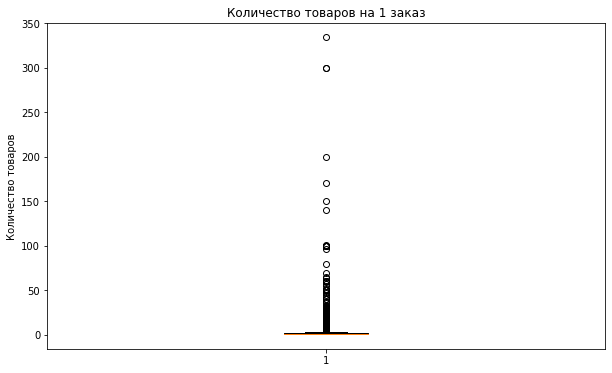

In [36]:
plt.figure(figsize=(10, 6))
plt.boxplot(order_1['quantity'])
plt.title('Количество товаров на 1 заказ')
plt.ylabel('Количество товаров')
plt.show()

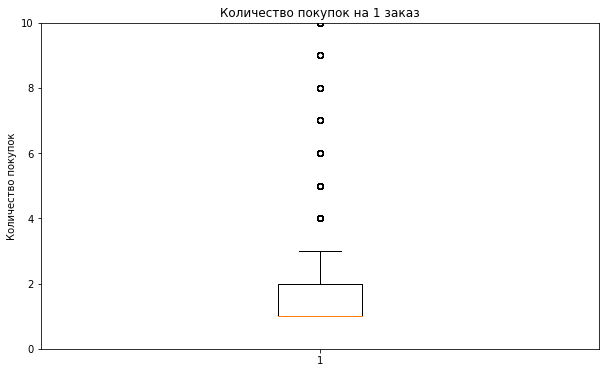

In [37]:
plt.figure(figsize=(10, 6))
plt.boxplot(order_1['quantity'])
plt.title('Количество покупок на 1 заказ')
plt.ylabel('Количество покупок')
plt.ylim(0,10)
plt.show()

Text(0, 0.5, 'Количество покупок')

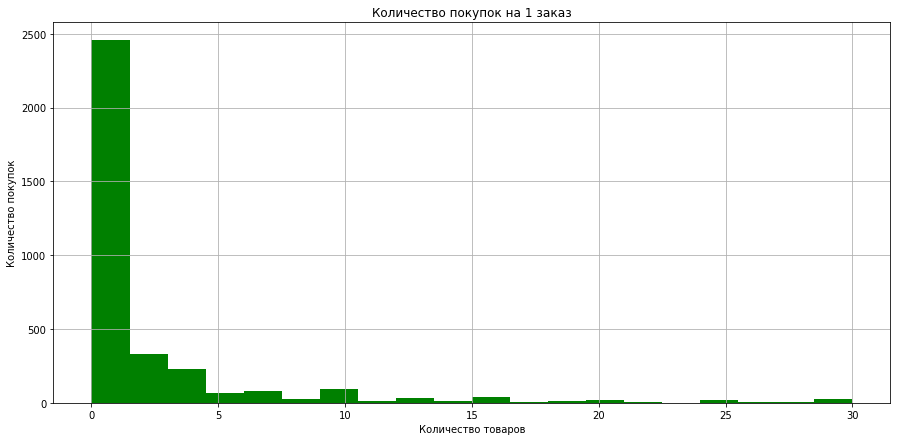

In [38]:
# Посмотрим на гистограмме 
order_1.hist(range=(0, 30), bins=20, figsize=(15, 7), color = 'green')
plt.title('Количество покупок на 1 заказ')
plt.xlabel('Количество товаров')
plt.ylabel('Количество покупок')

Text(0, 0.5, 'Количество покупок')

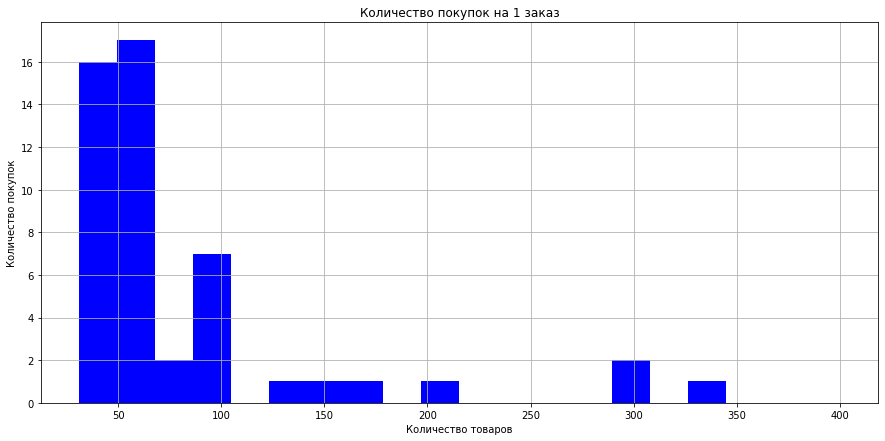

In [39]:
# Посмотрим на гистограмме 
order_1.hist(range=(31, 400), bins=20, figsize=(15, 7), color = 'blue')
plt.title('Количество покупок на 1 заказ')
plt.xlabel('Количество товаров')
plt.ylabel('Количество покупок')

**Вывод:** По графикам выше видно, что в основном покупатели за раз покупали по 1 одному товару.  Среднее количество покупок на 1 заказ составил 3.80. Мединана имеет - 1 единицу.

#### Посмотрим на 1 покупателя количество товаров

In [40]:
# исключим сразу покупку в 1000 единиц
customer_1 = ecom.groupby('customer_id').agg({'quantity': 'sum'})
customer_1.describe()

,quantity
count,2429.000000
mean,5.506793
std,18.038207
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,334.000000


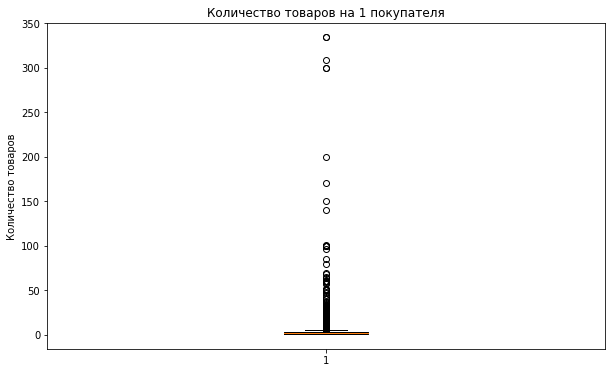

In [41]:
plt.figure(figsize=(10, 6))
plt.boxplot(customer_1.query('quantity < 1000')['quantity'])
plt.title('Количество товаров на 1 покупателя')
plt.ylabel('Количество товаров')
plt.show()

Text(0, 0.5, 'Количество покупателей')

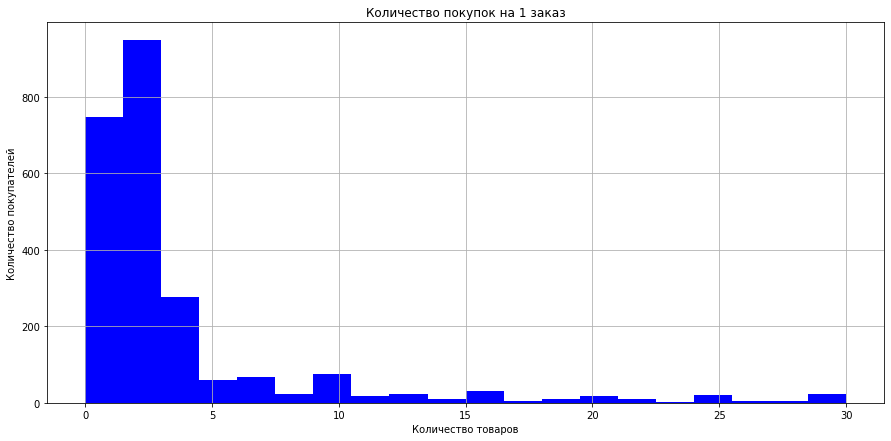

In [42]:
# построим гистограмму
customer_1.hist(range=(0, 30), bins=20, figsize=(15, 7), color = 'blue')
plt.title('Количество покупок на 1 заказ')
plt.xlabel('Количество товаров')
plt.ylabel('Количество покупателей')

Text(0, 0.5, 'Количество покупателей')

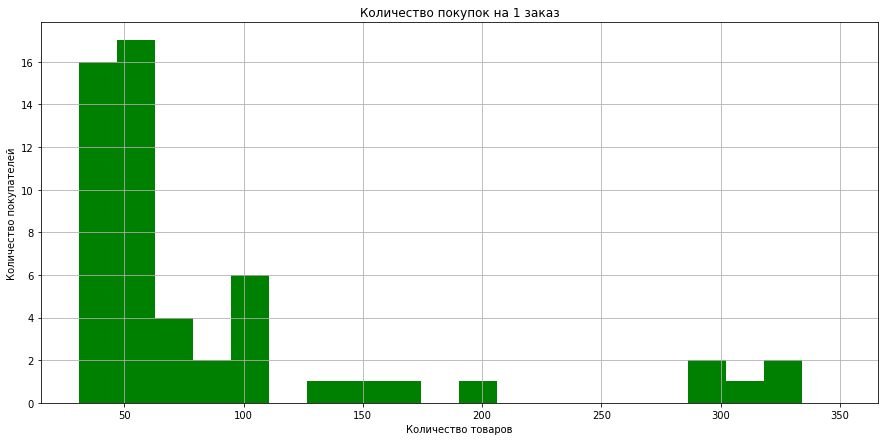

In [43]:
# построим гистограмму
customer_1.hist(range=(31, 350), bins=20, figsize=(15, 7), color = 'green')
plt.title('Количество покупок на 1 заказ')
plt.xlabel('Количество товаров')
plt.ylabel('Количество покупателей')

**Вывод:** На одного покупателя в среднем приходится  - 5.5 товаров. Медиана составляет - 1 товар. По графикам, покупатели в основном покупают 2 товара.

#### Посмотрим количество покупок по дате

In [44]:
# по месяцу
monthly_orders = ecom.groupby(ecom['date'].dt.to_period('M')).agg({'order_id': 'nunique'})
monthly_orders.sort_values(by = 'order_id', ascending=False)

,order_id
date,
2019-02,288
2018-12,282
2020-01,269
2019-04,264
2019-03,247
2019-12,246
2018-10,239
2019-11,217
2018-11,204


Text(0, 0.5, 'Количество покупок')

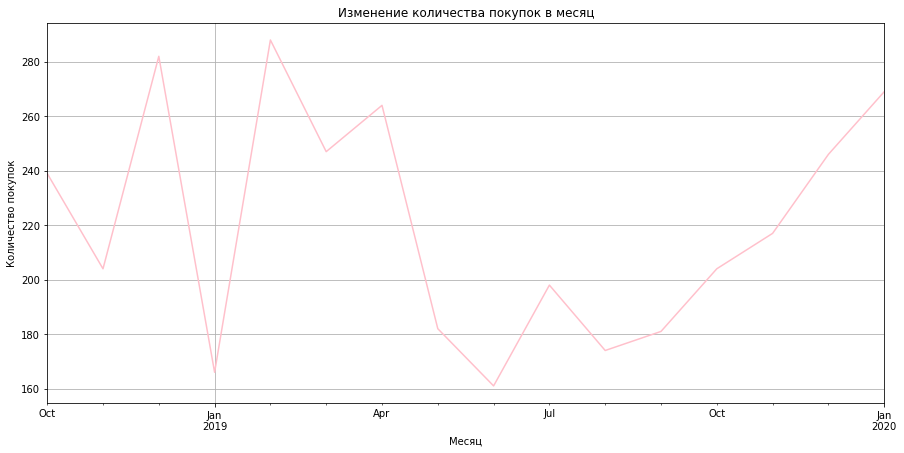

In [45]:
monthly_orders.plot(figsize=(15, 7), grid=True, legend=False, color = 'pink')
plt.title('Изменение количества покупок в месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество покупок')

In [46]:
# по дням недели за 2019 год 
year = 2019
ecom_year = ecom[ecom['date'].dt.year == year]
day_orders = ecom_year.groupby(ecom_year['date'].dt.day_name()).agg({'order_id': 'nunique'}).sort_values(by = 'order_id', ascending=False)
day_orders

,order_id
date,
Tuesday,431
Monday,427
Thursday,406
Wednesday,383
Sunday,326
Friday,314
Saturday,246


Text(0, 0.5, 'Количество покупок')

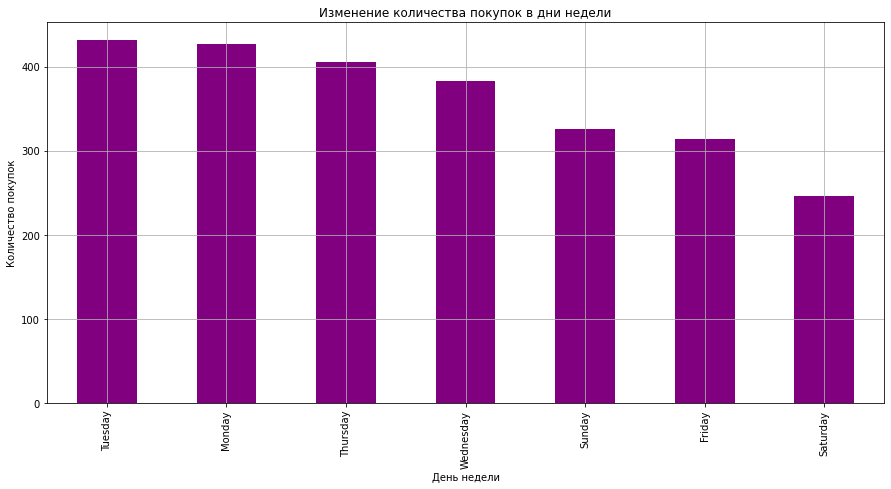

In [47]:
day_orders.plot(figsize=(15, 7), grid=True, legend=False, kind='bar',color = 'purple')
plt.title('Изменение количества покупок в дни недели')
plt.xlabel('День недели')
plt.ylabel('Количество покупок')

In [48]:
# по часам за 2019 год 
hour_orders = ecom_year.groupby(ecom_year['date'].dt.hour).agg({'order_id': 'nunique'})
hour_orders.sort_values(by = 'order_id', ascending=False)

,order_id
date,
11,210
12,202
10,191
13,189
14,185
15,176
9,160
16,150
17,140


Text(0, 0.5, 'Количество покупок')

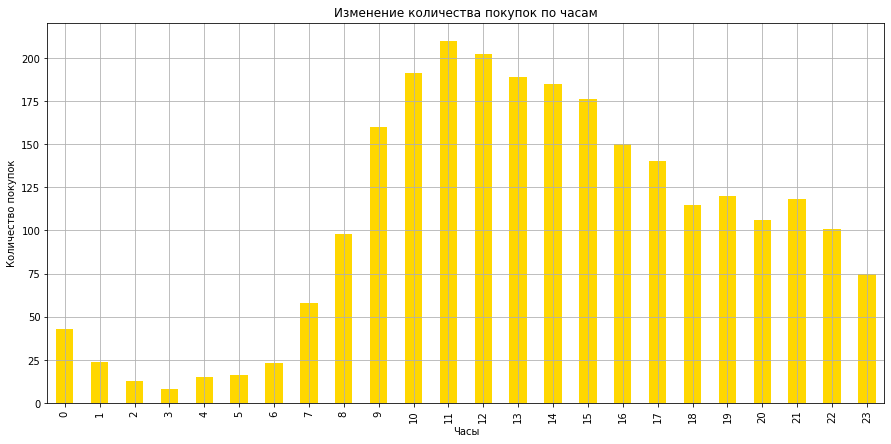

In [49]:
hour_orders.plot(figsize=(15, 7), grid=True, legend=False, kind='bar',color = 'gold')
plt.title('Изменение количества покупок по часам')
plt.xlabel('Часы')
plt.ylabel('Количество покупок')

**Вывод:** Больше всего заказов было совершенно в феврале 2019 года - 288, меньше всего в июне 2019 года - 162. Самый окупаемый день недели, это среда - 431 заказа, возможно в этот день проходят акции и заказов больше всего в этот день В субботу заказов меньше всего - 246 заказов. По часам, больше заказов в 11 и 12 часов. Можно предположить в это время проходит акция с 11 до 12 часов.

#### Посмотрим количество заказов на каждого пользователя

In [50]:
customer_orders = ecom.groupby(ecom['customer_id']).agg({'order_id': 'nunique'}).reset_index()
customer_orders.columns = ['customer_id', 'orders']
customer_orders.sort_values(by = 'orders', ascending=False).head(15)

,customer_id,orders
1899,c971fb21-d54c-4134-938f-16b62ee86d3b,126
735,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1088,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1731,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
693,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
1803,bea7a833-2074-42db-bc49-4457abd3c930,4
2126,e0535076-6270-4df2-8621-cb06264a94fa,4
1980,d16fbc13-50a6-4dea-aafc-bc197aafc9e4,3
2119,dfbcfde5-21de-4504-aff4-453e617d81c1,3


Text(0, 0.5, 'Количество заказов')

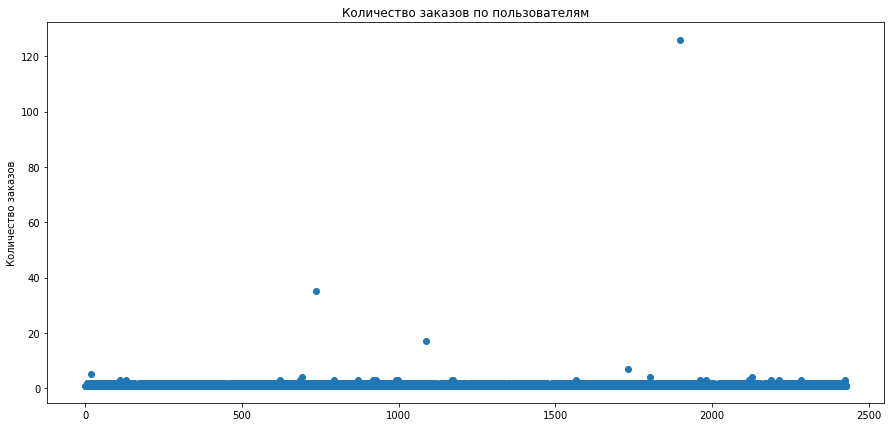

In [51]:
x_values = pd.Series(range(0, len(customer_orders)))
plt.figure(figsize=(15, 7))
plt.scatter(x_values, customer_orders['orders']);
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов')

In [52]:
# Найдем 95 и 99 персентиль
print(np.percentile(customer_orders['orders'], [95, 99]))

[2. 3.]


**Вывод:** Не более 5 % пользователей совершают 2 заказа, 1 % - 3 заказа.

Рейтинг по пользователям:
1. 126 заказов
2. 35 заказов
3. 17 заказов
4. 7 заказа
5. 5 заказов

#### Найдем выручку с каждой покупки

In [53]:
revenue = ecom.groupby('order_id').agg({'revenue': 'sum'})
revenue.describe()

,revenue
count,3520.000000
mean,1119.785346
std,2080.573823
min,9.000000
25%,193.750000
50%,577.000000
75%,1240.250000
max,49432.000000


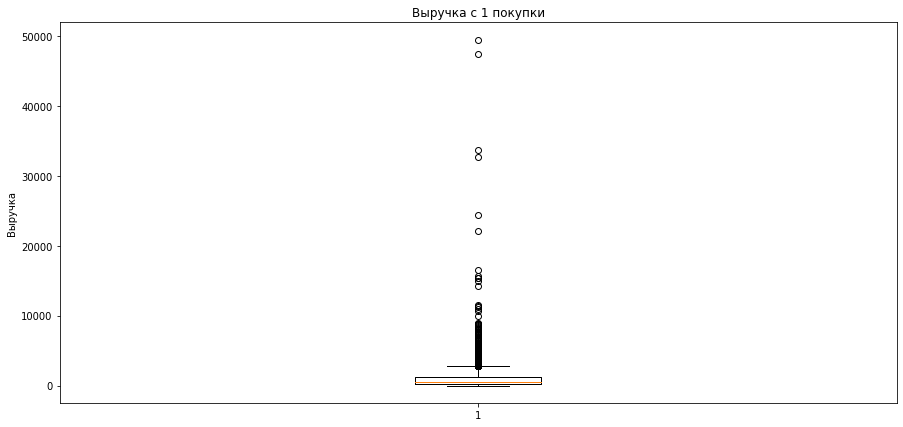

In [54]:
plt.figure(figsize=(15, 7))
plt.boxplot(revenue['revenue'])
plt.title('Выручка с 1 покупки')
plt.ylabel('Выручка')
plt.show()

Text(0, 0.5, 'Количество покупателей')

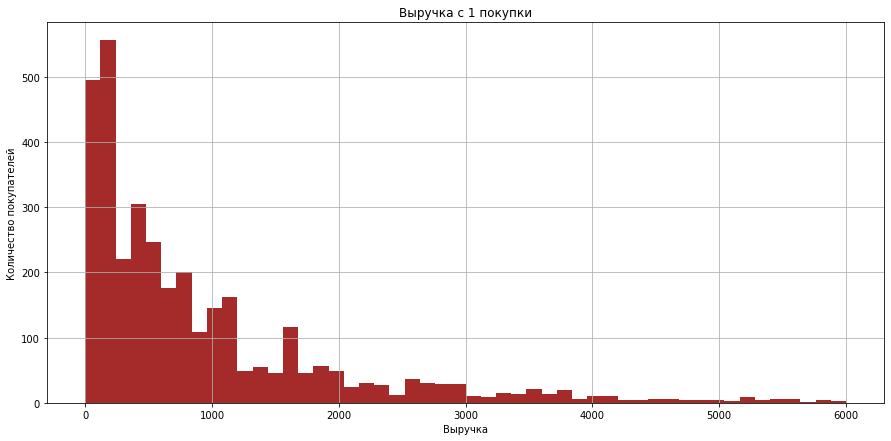

In [55]:
revenue.hist(range=(0, 6000),bins=50, figsize=(15, 7), color = 'brown')
plt.title('Выручка с 1 покупки')
plt.xlabel('Выручка')
plt.ylabel('Количество покупателей')

Text(0, 0.5, 'Количество покупателей')

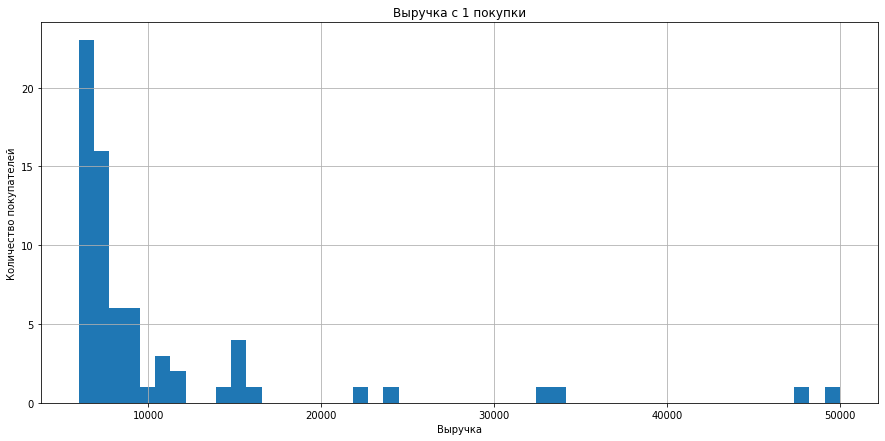

In [56]:
revenue.hist(range=(6001, 50000), bins=50, figsize=(15, 7))
plt.title('Выручка с 1 покупки')
plt.xlabel('Выручка')
plt.ylabel('Количество покупателей')

In [57]:
# Найдем 95 и 99 персентиль
print(np.percentile(revenue['revenue'], [95, 99]))

[3760.8  7492.96]


**Вывод:** Средняя выручка с 1 покупки составляет 1119.79 р. Медиана - 577 р. Минимальная выручка - 9 р. Максимальная выручка  - 49432 р. 

5% заказов принесли выручку не менее 3 760.8 р. 1% заказов - не менее 7492.96 р.

#### Найдем выручку на 1 покупателя

In [58]:
revenue_cust = ecom.groupby('customer_id').agg({'revenue': 'sum'})
revenue_cust.describe()

,revenue
count,2429.000000
mean,1622.743687
std,4327.300110
min,15.000000
25%,396.000000
50%,838.000000
75%,1798.000000
max,159508.000000


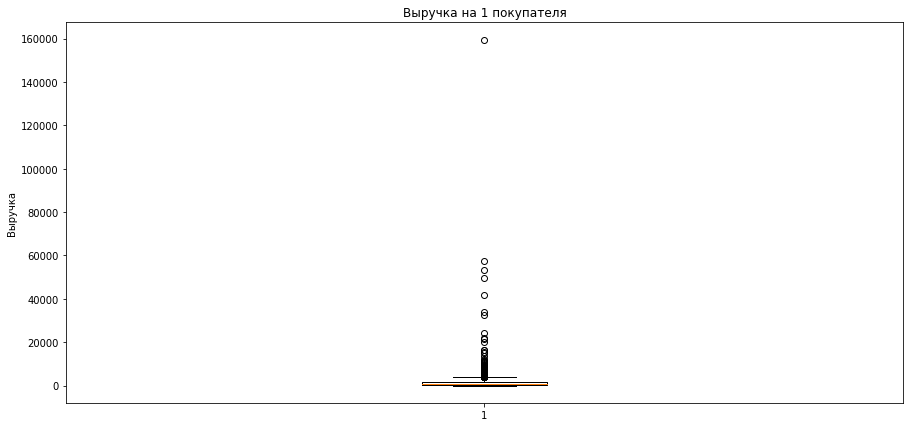

In [59]:
plt.figure(figsize=(15, 7))
plt.boxplot(revenue_cust['revenue'])
plt.title('Выручка на 1 покупателя')
plt.ylabel('Выручка')
plt.show()

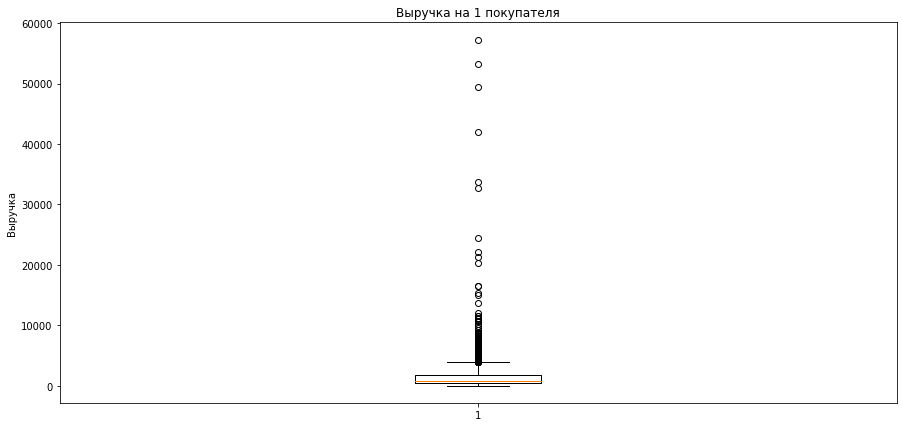

In [60]:
plt.figure(figsize=(15, 7))
plt.boxplot(revenue_cust.query('revenue < 150000')['revenue'])
plt.title('Выручка на 1 покупателя')
plt.ylabel('Выручка')
plt.show()

Text(0, 0.5, 'Количество покупателей')

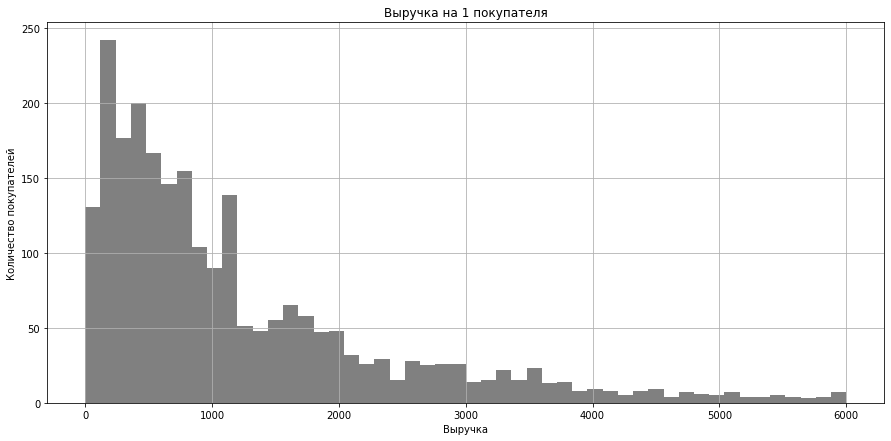

In [61]:
revenue_cust.query('revenue < 150000').hist(range=(0, 6000),bins=50, figsize=(15, 7), color = 'grey')
plt.title('Выручка на 1 покупателя')
plt.xlabel('Выручка')
plt.ylabel('Количество покупателей')

In [62]:
# Найдем 95 и 99 персентиль
print(np.percentile(revenue_cust['revenue'], [95, 99]))

[4871.2  9793.76]


**Вывод:** Средняя выручка на 1 покупателя составляет 1622,74 р. Медиана - 838 р. Минимальная выручка - 15 р. Максимальная выручка  - 159508 р. 

5% заказов принесли выручку не менее 4871.2 р. 1% заказов - не менее 9793.76 р.

#### Посмотрим выручку по дате

In [63]:
monthly_revenue = ecom.groupby(ecom['date'].dt.to_period('M')).agg({'revenue': 'sum'})
monthly_revenue['revenue'] = monthly_revenue['revenue'].round(2)
monthly_revenue.sort_values(by='revenue', ascending=False)

,revenue
date,
2018-11,359348.00
2018-10,351536.00
2018-12,349750.00
2019-04,315239.00
2019-02,306377.00
2019-03,253084.00
2019-05,237784.00
2019-07,235171.00
2019-01,234917.00


Text(0, 0.5, 'Выручка')

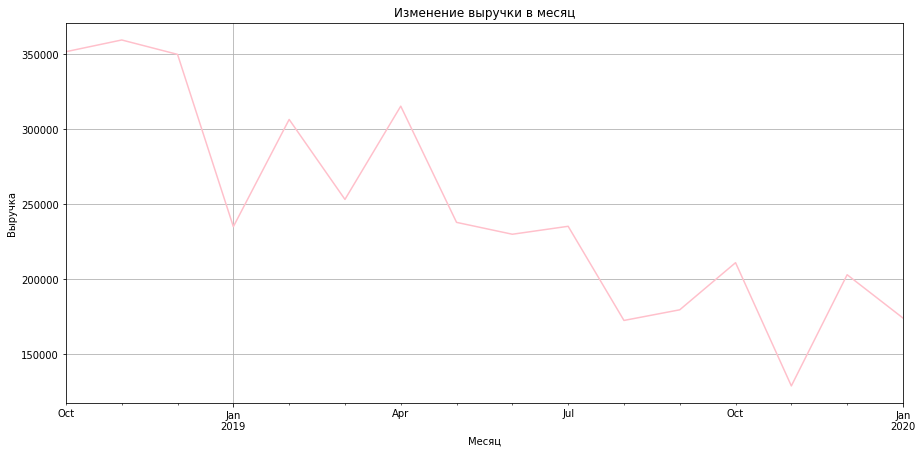

In [64]:
monthly_revenue.plot(figsize=(15, 7), grid=True, legend=False, color = 'pink')
plt.title('Изменение выручки в месяц')
plt.xlabel('Месяц')
plt.ylabel('Выручка')

**Вывод:** В ноябре 2018 года выручка была самой высокой - 359348 р., после выручка была в октябре - 351536 р. Самой низкой выручкой была в ноябре 2019 года - 128791.25 р.

#### Посмотрим средний чек по дате

In [65]:
avg_check = ecom.groupby(ecom['date'].dt.to_period('M')).agg({'revenue':'sum','customer_id':'nunique'}).reset_index()
avg_check['avg_check'] = avg_check['revenue'] / avg_check['customer_id']
avg_check['revenue'] = avg_check['revenue'].round(2)
avg_check['avg_check'] = avg_check['avg_check'].round(2)
avg_check.sort_values(by='avg_check', ascending=False)

,date,revenue,customer_id,avg_check
1,2018-11,359348.00,178,2018.81
0,2018-10,351536.00,180,1952.98
3,2019-01,234917.00,150,1566.11
8,2019-06,229871.00,151,1522.32
2,2018-12,349750.00,233,1501.07
7,2019-05,237784.00,168,1415.38
6,2019-04,315239.00,235,1341.44
9,2019-07,235171.00,186,1264.36
4,2019-02,306377.00,246,1245.43
12,2019-10,210924.00,175,1205.28


Text(0, 0.5, 'Выручка')

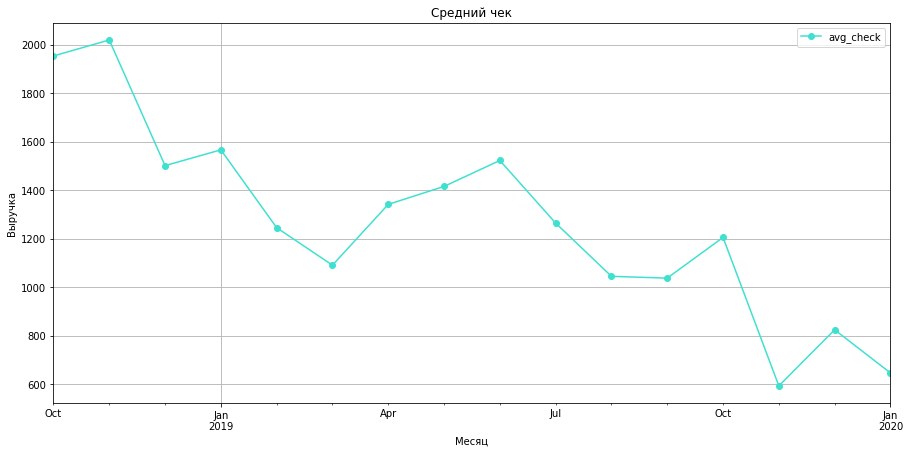

In [66]:
avg_check.plot(figsize=(15, 7),marker='o', x='date', y='avg_check', grid=True, color = 'turquoise');
plt.title('Средний чек')
plt.xlabel('Месяц')
plt.ylabel('Выручка')

**Вывод:** В ноябре 2018 году средний чек был - 2018.81 р, самый высокий из всех месяцев. Самый низкий средний чек был в ноябре 2019 года - 593.51 р.

<p></p>

<div style="border:solid green 2px; padding: 10px">
    
**Вывод:**
    
1. Самый дорогой товар это сушилка уличная - 14917 р.После сумка-тележка - 8737 р. В топ 10 по прайсу входят товары для дома и для строительства (тележки и стремянка).  

2. Покупатель купивший 1000 вантузов с выручкой 675000 р. принес компании самую большую выручку, это одноразовая покупка. Данную аномалию удалили. Покупка была совершена в июне 2018 года. На втором месте покупатель с вешалками в количестве 334 шт. с выручкой  - 49432, покупка совершена в июне 2018 года. 

3. По графикам выше видно, что в основном покупатели за раз покупали по 1 одному товару.  Среднее количество покупок на 1 заказ составил 3.80. Мединана имеет - 1 единицу.
    
4.  На одного покупателя в среднем приходится  - 5.5 товаров. Медиана составляет - 1 товар. По графикам, покупатели в основном покупают 2 товара.
    
5. Больше всего заказов было совершенно в феврале 2019 года - 288, меньше всего в июне 2019 года - 162. Самый окупаемый день недели, это среда - 431 заказа, возможно в этот день проходят акции и заказов больше всего в этот день В субботу заказов меньше всего - 246 заказов. По часам, больше заказов в 11 и 12 часов. Можно предположить в это время проходит акция с 11 до 12 часов.
    
6. Не более 5 % пользователей совершают 2 заказа, 1 % - 3 заказа.

Рейтинг по пользователям:
    
    1. 126 заказов
    2. 35 заказов
    3. 17 заказов
    4. 7 заказа
    5. 5 заказов
    
7.  Средняя выручка с 1 покупки составляет 1119.79 р. Медиана - 577 р. Минимальная выручка - 9 р. Максимальная выручка  - 49432 р. 

5% заказов принесли выручку не менее 3 760.8 р. 1% заказов - не менее 7492.96 р.
    
8. Средняя выручка на 1 покупателя составляет 1622,74 р. Медиана - 838 р. Минимальная выручка - 15 р. Максимальная выручка  - 159508 р. 

5% заказов принесли выручку не менее 4871.2 р. 1% заказов - не менее 9793.76 р.
    
    
9. В ноябре 2018 года выручка была самой высокой - 359348 р., после выручка была в октябре - 351536 р. Самой низкой выручкой была в ноябре 2019 года - 128791.25 р.

10. В ноябре 2018 году средний чек был - 2018.81 р, самый высокий из всех месяцев. Самый низкий средний чек был в ноябре 2019 года - 593.51 р. 
    
 
    
</div>

### Сегментируем покупателей на основе истории их покупок. Сформируем сегменты на основе того, что покупают пользователи.  Проанализируем их покупки и сегментируем товары на основе принадлежности к той или иной товарной категории.

In [67]:
ecom.category.value_counts()

Товары для сада     2486
Товар для дома      1955
Кухня                375
Искусственный        315
Овощи и фрукты       242
Строительство         93
Бытовые средства      46
Ванна                 41
Name: category, dtype: int64

Разделили товары на категории:
- Товары для сада     2486
- Товар для дома      1955
- Кухня                375
- Искусственный        315
- Овощи и фрукты       242
- Строительство         93
- Бытовые средства      46
- Ванна                 42


#### Найдем выручку и средний чек в разрезе категорий товаров

In [68]:
# исключим вантузы
filtered_ecom = ecom[ecom['quantity'] < 1000]
avg_revenue = filtered_ecom.groupby('category').agg({'revenue': 'sum', 'customer_id': 'nunique', 'order_id': 'nunique'}) \
                        .sort_values(by='revenue', ascending=False).reset_index()
avg_revenue['avg_revenue_customer'] = avg_revenue['revenue'] /avg_revenue['customer_id']
avg_revenue['avg_revenue_customer'] = avg_revenue['avg_revenue_customer'].round(2)
avg_revenue['avg_revenue_order'] = avg_revenue['revenue'] /avg_revenue['order_id']
avg_revenue['avg_revenue_order'] = avg_revenue['avg_revenue_order'].round(2)
avg_revenue.columns = ['category','revenue', 'unique_customers', 'unique_orders', 'avg_check_customer', 'avg_check_order']
avg_revenue.sort_values(by = 'revenue', ascending=False)

,category,revenue,unique_customers,unique_orders,avg_check_customer,avg_check_order
0,Товар для дома,2.773181e+06,1412,1804,1964.01,1537.24
1,Товары для сада,5.252363e+05,846,994,620.85,528.41
2,Кухня,3.033600e+05,305,333,994.62,910.99
3,Строительство,1.507883e+05,78,86,1933.18,1753.35
4,Искусственный,1.154063e+05,216,234,534.29,493.19
5,Овощи и фрукты,3.107100e+04,68,71,456.93,437.62
6,Ванна,2.727000e+04,37,41,737.03,665.12
7,Бытовые средства,1.533100e+04,39,39,393.10,393.10


**Вывод:** Товары для дома принесли наибольшую выручку  - 2.773181е+06 р. со средним чеком 1537.24. На втором месте товары для сада с выручкой - 5.252363е+05 р. и средним чеком 528.41 р. На третьем месте категория кухня с выручкой 5.252363е+05 р. со средним чеком 910.99р.

#### Найдем выручку по месяцам

Text(0, 0.5, 'Выручка')

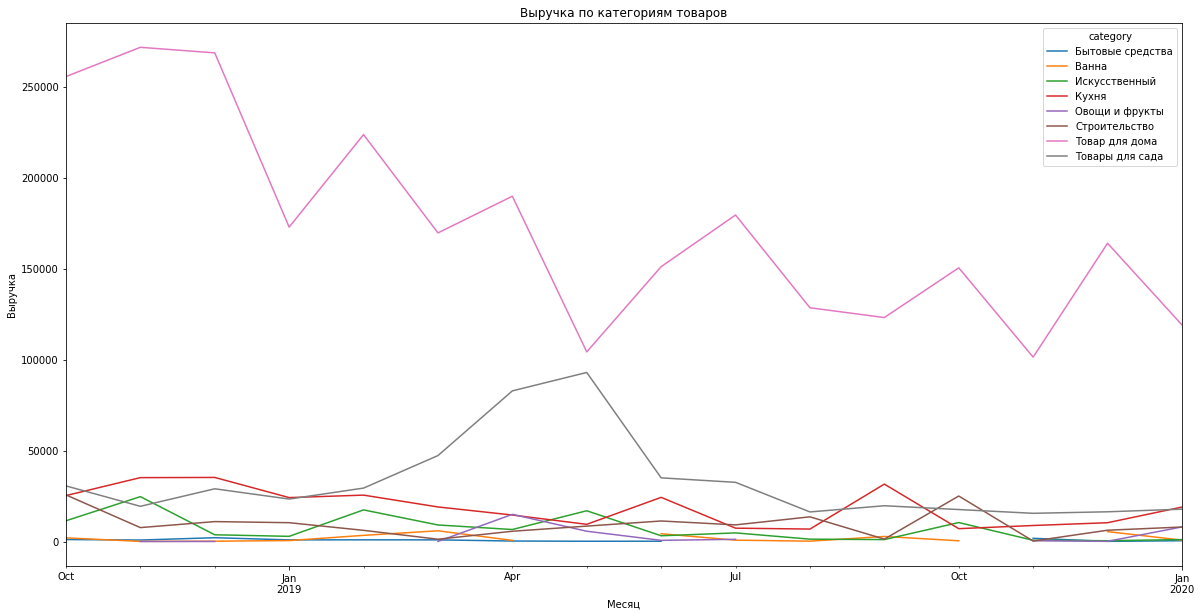

In [69]:
# исключим покупателя с вантузом
filtered_ecom = ecom[ecom['quantity'] < 1000]
month = ecom['date'].dt.to_period('M')
filtered_ecom.pivot_table(index=month, columns='category',values='revenue', aggfunc='sum').plot(figsize=(20, 10))
plt.title('Выручка по категориям товаров')
plt.xlabel('Месяц')
plt.ylabel('Выручка')

**Вывод:** По графикам видно, что товары для дома имеют актуальность почти во все месяцы, ближе к маю выручка падает, видимо связано с популярностью товаров для сада и покупатели больше тратят на эту катугорию. Так как весной начинается период огорода, и также заметим, что с февраля 2019 года по май 2019 года товары для сада имеют наибольшую выручку и к маю она спадает. Категория Кухня имеет популярность в ноябрь и декабрь 2019 года, также пики в июне 2019 года и в сентябре 2019 года. Остальные категории не имееют какой-то зависимости от месяца, есть и спады и взлеты, но небольшие.

#### Найдем количество уникальных покупок по месяцам 

In [70]:
filtered_ecom.pivot_table(index=month, columns='category',values='order_id', aggfunc='nunique')

category,Бытовые средства,Ванна,Искусственный,Кухня,Овощи и фрукты,Строительство,Товар для дома,Товары для сада
date,,,,,,,,
2018-10,3.0,4.0,13.0,24.0,NaN,11.0,165.0,38.0
2018-11,5.0,1.0,19.0,33.0,1.0,8.0,126.0,29.0
2018-12,4.0,3.0,7.0,40.0,1.0,5.0,171.0,53.0
2019-01,3.0,1.0,12.0,26.0,NaN,5.0,93.0,26.0
2019-02,4.0,5.0,29.0,29.0,NaN,4.0,144.0,75.0
2019-03,2.0,4.0,21.0,24.0,1.0,2.0,115.0,81.0
2019-04,1.0,3.0,34.0,8.0,11.0,4.0,114.0,100.0
2019-05,1.0,NaN,7.0,8.0,16.0,3.0,71.0,91.0
2019-06,1.0,5.0,8.0,10.0,3.0,5.0,84.0,51.0


Text(0, 0.5, 'Количество уникальных покупок')

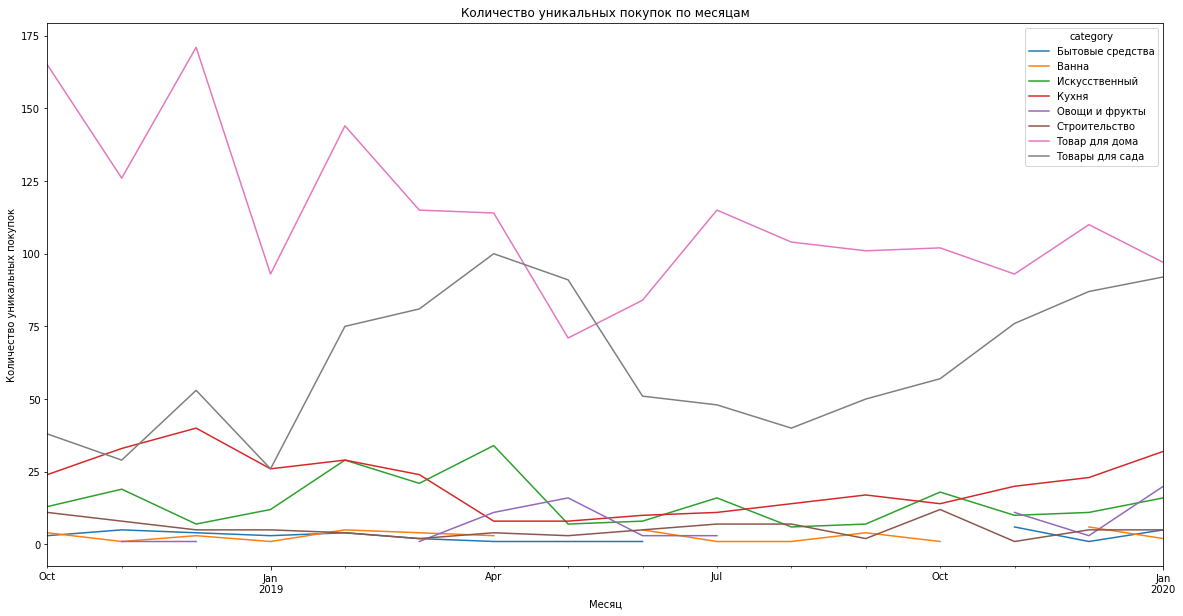

In [71]:
filtered_ecom.pivot_table(index=month, columns='category',values='order_id', aggfunc='nunique').plot(figsize=(20, 10))
plt.title('Количество уникальных покупок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных покупок')

**Вывод:** Уникальных покупок в категории товары для сада в период с февраля 2019 года по июнь 2019 года было сделано больше всего. Спад был в январе 2019 года. Товары для дома имели больше всего уникальных покупок в декабре 2019 года. Спад был в мае 2019 года. Категория "искусственный" имела больше всего уникальных покупок в апреле 2019 года. Остальные категории не имеют сильную зависимость от сезонности.

#### Найдем количество уникальных покупателей по месяцам 

In [72]:
filtered_ecom.pivot_table(index=month, columns='category',values='customer_id', aggfunc='nunique')

category,Бытовые средства,Ванна,Искусственный,Кухня,Овощи и фрукты,Строительство,Товар для дома,Товары для сада
date,,,,,,,,
2018-10,3.0,3.0,12.0,20.0,NaN,10.0,121.0,35.0
2018-11,5.0,1.0,18.0,30.0,1.0,8.0,107.0,28.0
2018-12,4.0,3.0,7.0,39.0,1.0,4.0,138.0,44.0
2019-01,3.0,1.0,8.0,26.0,NaN,5.0,84.0,26.0
2019-02,4.0,4.0,27.0,27.0,NaN,4.0,124.0,62.0
2019-03,2.0,4.0,20.0,22.0,1.0,2.0,111.0,77.0
2019-04,1.0,2.0,32.0,7.0,11.0,4.0,103.0,88.0
2019-05,1.0,NaN,7.0,8.0,13.0,3.0,68.0,83.0
2019-06,1.0,4.0,8.0,9.0,3.0,5.0,80.0,48.0


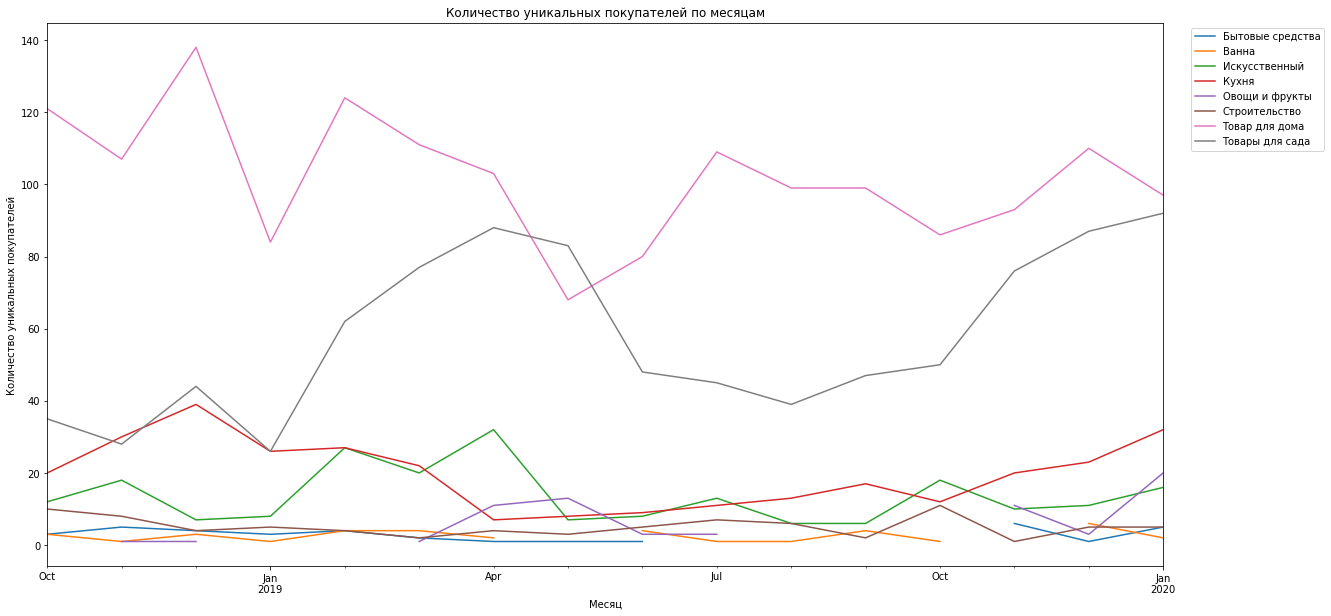

In [73]:
filtered_ecom.pivot_table(index=month, columns='category',values='customer_id', aggfunc='nunique').plot(figsize=(20, 10))
plt.title('Количество уникальных покупателей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество уникальных покупателей')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')

**Вывод:** зависимость от количества уникальных покупателей по месяцам аналогична также как и зависимость количество уникальных покупок по месяцам 

<p></p>

<div style="border:solid green 2px; padding: 10px">
    
**Вывод:**
 1. Разделили товары на категории:
    - Товары для сада     2486
    - Товар для дома      1955
    - Кухня                375
    - Искусственный        315
    - Овощи и фрукты       242
    - Строительство         93
    - Бытовые средства      46
    - Ванна                 42
    
 2. Товары для дома принесли наибольшую выручку  - 2.773181е+06 р. со средним чеком 1537.24. На втором месте товары для сада с выручкой - 5.252363е+05 р. и средним чеком 528.41 р. На третьем месте категория кухня с выручкой 5.252363е+05 р. со средним чеком 910.99р.

  
 3. По графикам видно, что товары для дома имеют актуальность почти во все месяцы, ближе к маю выручка падает, видимо связано с популярностью товаров для сада и покупатели больше тратят на эту катугорию. Так как весной начинается период огорода, и также заметим, что с февраля 2019 года по май 2019 года товары для сада имеют наибольшую выручку и к маю она спадает. Категория Кухня имеет популярность в ноябрь и декабрь 2019 года, также пики в июне 2019 года и в сентябре 2019 года. Остальные категории не имееют какой-то зависимости от месяца, есть и спады и взлеты, но небольшие.
    
    
 4. Уникальных покупок в категории товары для сада в период с февраля 2019 года по июнь 2019 года было сделано больше всего. Спад был в январе 2019 года. Товары для дома имели больше всего уникальных покупок в декабре 2019 года. Спад был в мае 2019 года. Категория "искусственный" имела больше всего уникальных покупок в апреле 2019 года. Остальные категории не имеют сильную зависимость от сезонности.   
    
    
 5. Зависимость от количества уникальных покупателей по месяцам аналогична также как и зависимость количество уникальных покупок по месяцам 
    

### Произведем RFM-анализ (метод сегментации клиентов).

Создадим алгоритм для RFM-анализ

Шаг 1. Собираем информацию

По каждому покупателю выделяем информацию для анализа:

— Количество единиц товаров;

— Частота заказа;

— Сумма чека.

Шаг 2. Выбираем диапазоны сегментирования

Количество единиц товаров 1 — равно 1, 2 — больше 1;

Частота заказа: 1 — заказывал один раз, 2 — заказывал больше одного раза

Сумма чека: 1 — до 1000 рублей, 2 — больше 1000 рублей


In [74]:
#создадим списки пользователей и заказов по условиям профилей:
general = ecom.groupby(['date', 'order_id']).agg({'revenue': 'sum', 'quantity': 'sum'}).reset_index()
general.columns = ['date', 'order_id', 'revenue', 'count']
order_fr = ecom.groupby(['customer_id']).agg({'order_id': 'nunique'}).reset_index()
order_fr.columns = ['customer_id', 'orders_count']

#для `count_tovar`
count_1 = general.query('count == 1')['order_id'].unique()
count_2 = general.query('count > 1')['order_id'].unique()

#для `order frequency`
order_fr_1 = order_fr.query('orders_count == 1')['customer_id'].unique()
order_fr_2 = order_fr.query('orders_count > 1')['customer_id'].unique()

#для `sum_bill`

sum_bill_1 = general.query('revenue <= 1000')['order_id'].unique()
sum_bill_2 = general.query('revenue > 1000')['order_id'].unique()

In [75]:
#создадим столбцы
ecom['count_tovar'] = None

#заполним значение по условию
ecom.loc[(ecom['order_id'].isin(count_1)), 'count_tovar'] = 1
ecom.loc[(ecom['order_id'].isin(count_2)), 'count_tovar'] = 2

#создадим столбцы
ecom['order_frequency'] = None

#заполним значение по условию
ecom.loc[(ecom['customer_id'].isin(order_fr_1)), 'order_frequency'] = 1
ecom.loc[(ecom['customer_id'].isin(order_fr_2)), 'order_frequency'] = 2

#создадим столбцы
ecom['sum_bill'] = None

#заполним значение по условию
ecom.loc[(ecom['order_id'].isin(sum_bill_1)), 'sum_bill'] = 1
ecom.loc[(ecom['order_id'].isin(sum_bill_2)), 'sum_bill'] = 2

In [76]:
ecom

,date,customer_id,order_id,product,quantity,price,product_2,category,revenue,count_tovar,order_frequency,sum_bill
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,Комнатное растение,Товары для сада,142.0,2,1,2
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,Комнатное растение,Товары для сада,194.0,2,1,2
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,Радермахера,Товары для сада,112.0,2,1,2
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,Хризолидокарпус,Товары для сада,179.0,2,1,2
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,Циперус,Товары для сада,112.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,Томат,Овощи и фрукты,76.0,2,2,1
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,Дендробиум,Товары для сада,869.0,1,2,1
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,Подставка,Товар для дома,354.0,1,2,1
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,Рассада,Товары для сада,128.0,1,2,1


In [77]:
ecom_profile = ecom.drop(['date', 'order_id', 'product', 'quantity', 'price', 'product_2','category', 'revenue'], axis=1)
ecom_profile = ecom_profile.drop_duplicates()
ecom_profile.head(10)

,customer_id,count_tovar,order_frequency,sum_bill
0,ee47d746-6d2f-4d3c-9622-c31412542920,2,1,2
7,375e0724-f033-4c76-b579-84969cf38ee2,1,1,1
8,6644e5b4-9934-4863-9778-aaa125207701,1,2,1
9,c971fb21-d54c-4134-938f-16b62ee86d3b,1,2,1
10,161e1b98-45ba-4b4e-8236-e6e3e70f6f7c,2,1,1
11,86432d8d-b706-463b-bd5d-6a9e170daee3,1,2,1
12,4d93d3f6-8b24-403b-a74b-f5173e40d7db,1,2,1
13,0948b0c2-990b-4a11-b835-69ac4714b21d,2,1,2
14,a576fa59-7b28-4a4c-a496-92f128754a94,1,2,1
15,17213b88-1514-47a4-b8aa-ce51378ab34e,2,1,2


In [78]:
ecom_profile['total'] = ecom_profile[ecom_profile.columns[1:4]].apply(lambda x: ''.join(x.dropna().astype(int).astype(str)), axis=1)
ecom_profile['total'].value_counts()

121    746
111    476
211    473
122    355
212    316
112    278
221    113
222     52
Name: total, dtype: int64

**Вывод:**
У нас получилось 8  уникальных сегментов:
1. 1 товар, заказывал больше 1 раза, до 1000 рублей - 746 покупателей
2. 1 товар, заказывал один раз, до 1000 рублей - 476 покупателей
3. больше 1 товара, заказывал один раз,  до 1000 рублей - 473 покупателя
4. 1 товар, заказывал больше 1 раза, больше 1000 рублей - 355 покупателей
5. больше 1 товара, заказывал один раз,  больше 1000 рублей - 317 покупателей
6. 1 товар, заказывал один раз, больше 1000 рублей - 278 покупателей
7. больше 1 товара, заказывал больше 1 раза,  до 1000 рублей - 113 покупателей
8. больше 1 товара, заказывал больше 1 раза,  больше 1000 рублей - 52 покупателя

###  Проверим 2 гипотезы

**Статистическая значимость различий в среднем чеке заказа между категориями по «сырым» данным**

H0: Различие в среднем чеке заказа между категориями отсутствует.

H1: Различие в среднем чеке заказа между категориями имеется.

In [79]:
def test(ecom, alpha=0.01):
 
    categories = ecom['category'].unique()
    results = []

    for cat1, cat2 in combinations(categories, 2):
        ecom_1 = ecom[ecom['category'] == cat1]['revenue']
        ecom_2 = ecom[ecom['category'] == cat2]['revenue']
        
 # Проведение теста Манна-Уитни
        mannwhitney_result = st.mannwhitneyu(ecom_2, ecom_1)

        result = {
            'category1': cat1,
            'category2': cat2,
            'p-value': mannwhitney_result.pvalue,
            'reject_null': mannwhitney_result.pvalue < alpha
        }
        
        results.append(result)

        print(f'{cat1} и {cat2}')
        print('p-value:', mannwhitney_result.pvalue)
         
        # Статистическая значимость
        mean = ecom_2.mean() / ecom_1.mean() - 1
        print('Статистическая значимость:', '{0:.3f}'.format(mean))

        if mannwhitney_result.pvalue < alpha:
            print('Отвергаем нулевую гипотезу')
        else:
            print('Не получилось отвергнуть нулевую гипотезу')
        print('---')

    return results

In [80]:
results = test(ecom)

Товары для сада и Товар для дома
p-value: 0.0
Статистическая значимость: 5.714
Отвергаем нулевую гипотезу
---
Товары для сада и Кухня
p-value: 1.055135084891039e-73
Статистическая значимость: 2.829
Отвергаем нулевую гипотезу
---
Товары для сада и Искусственный
p-value: 7.344447992083266e-05
Статистическая значимость: 0.734
Отвергаем нулевую гипотезу
---
Товары для сада и Ванна
p-value: 6.0303038091536585e-09
Статистическая значимость: 2.148
Отвергаем нулевую гипотезу
---
Товары для сада и Строительство
p-value: 1.1696850376663107e-16
Статистическая значимость: 6.674
Отвергаем нулевую гипотезу
---
Товары для сада и Бытовые средства
p-value: 0.06257657050639014
Статистическая значимость: 0.577
Не получилось отвергнуть нулевую гипотезу
---
Товары для сада и Овощи и фрукты
p-value: 3.897742047421072e-68
Статистическая значимость: -0.392
Отвергаем нулевую гипотезу
---
Товар для дома и Кухня
p-value: 3.358670481144991e-17
Статистическая значимость: -0.430
Отвергаем нулевую гипотезу
---
Товар

**Вывод:** 
По сырым данным не получилось отвергнуть гипотезу у категорий:

    -Ванная и Строительство (со статистической значимостью -0.903)
    -Кухня и Ванна (со статистической значимостью 19.669)
    -Товар для дома и Строительство (со статистической значимостью: 0.143)
    -Товары для сада и Бытовые средства (со статистической значимостью:0.577)
    
У этих категориях имеется различие в среднем чеке заказа.

**Статистическая значимость различий в среднем чеке заказа между категориями по «очищенным» данным**



In [81]:
#  подготовим данные очищенные
usersWithManyOrders = pd.concat([customer_orders[customer_orders['orders'] > 2]['customer_id']])
usersWithExpensiveOrders = ecom[ecom['revenue'] > 3761]['customer_id']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [82]:
def test_2(ecom, alpha=0.01):
 
    categories = ecom['category'].unique()
    results_2 = []

    for cat1, cat2 in combinations(categories, 2):
         
        ecom_1 = ecom[np.logical_and(ecom['category'] == cat1, np.logical_not(ecom['customer_id'].isin(abnormalUsers)),)]['revenue']
        ecom_2 = ecom[np.logical_and(ecom['category'] == cat2, np.logical_not(ecom['customer_id'].isin(abnormalUsers)),)]['revenue']
        
 # Проведение теста Манна-Уитни
        mannwhitney_result = st.mannwhitneyu(ecom_2, ecom_1)

        result = {
            'category1': cat1,
            'category2': cat2,
            'p-value': mannwhitney_result.pvalue,
            'reject_null': mannwhitney_result.pvalue < alpha
        }
        
        results.append(result)

        print(f'{cat1} и {cat2}')
        print('p-value:', mannwhitney_result.pvalue)
         
        # Статистическая значимость
        mean = ecom_2.mean() / ecom_1.mean() - 1
        print('Статистическая значимость:', '{0:.3f}'.format(mean))

        if mannwhitney_result.pvalue < alpha:
            print('Отвергаем нулевую гипотезу')
        else:
            print('Не получилось отвергнуть нулевую гипотезу')
        print('---')

    return results_2

In [83]:
results_2 = test_2(ecom)

Товары для сада и Товар для дома
p-value: 0.0
Статистическая значимость: 4.007
Отвергаем нулевую гипотезу
---
Товары для сада и Кухня
p-value: 4.151996412861147e-64
Статистическая значимость: 2.440
Отвергаем нулевую гипотезу
---
Товары для сада и Искусственный
p-value: 1.839053260099395e-06
Статистическая значимость: 0.242
Отвергаем нулевую гипотезу
---
Товары для сада и Ванна
p-value: 3.3950923329561583e-08
Статистическая значимость: 2.308
Отвергаем нулевую гипотезу
---
Товары для сада и Строительство
p-value: 4.192973151088438e-12
Статистическая значимость: 4.834
Отвергаем нулевую гипотезу
---
Товары для сада и Бытовые средства
p-value: 0.017532378518731948
Статистическая значимость: 0.263
Не получилось отвергнуть нулевую гипотезу
---
Товары для сада и Овощи и фрукты
p-value: 1.178322088680945e-66
Статистическая значимость: -0.670
Отвергаем нулевую гипотезу
---
Товар для дома и Кухня
p-value: 6.030182073277989e-12
Статистическая значимость: -0.313
Отвергаем нулевую гипотезу
---
Товар

**Вывод:** 
По очищенным данным не получилось отвергнуть гипотезу у категорий:

    -Ванная и Строительство (со статистической значимостью 0.764)
    -Кухня и Строительство (со статистической значимостью 0.696)
    -Кухня и Ванна (со статистической значимостью -0.038)
    -Товар для дома и Строительство (со статистической значимостью: 0.163)
    -Товары для сада и Бытовые средства (со статистической значимостью: 0.263)
    
У этих категориях отсутствует различие в среднем чеке заказа.

<p></p>

<div style="border:solid green 2px; padding: 10px">
    
**Общий вывод:**
    
    
**Изучили данные и выполнили предобработку данных**
    
    1. Провели анализ данных.
    2. Удалили неявные дубликаты. 
    3. Поменяли тип данных у date.
    4. Добавили столбец category.
    
   
**Произвели исследовательский анализ данных**
    
1. Самый дорогой товар это сушилка уличная - 14917 р. После сумка-тележка - 8737 р. В топ 10 по прайсу входят товары для дома и для строительства (тележки и стремянка).  

2. Покупатель купивший 1000 вантузов с выручкой 675000 р. принес компании самую большую выручку, это одноразовая покупка. Данную аномалию удалили. Покупка была совершена в июне 2018 года. На втором месте покупатель с вешалками в количестве 334 шт. с выручкой  - 49432, покупка совершена в июне 2018 года. 

3. По графикам выше видно, что в основном покупатели за раз покупали по 1 одному товару.  Среднее количество покупок на 1 заказ составил 3.80. Мединана имеет - 1 единицу.
    
4.  На одного покупателя в среднем приходится  - 5.5 товаров. Медиана составляет - 1 товар. По графикам, покупатели в основном покупают 2 товара.
    
5. Больше всего заказов было совершенно в феврале 2019 года - 288, меньше всего в июне 2019 года - 162. Самый окупаемый день недели, это среда - 431 заказа, возможно в этот день проходят акции и заказов больше всего в этот день В субботу заказов меньше всего - 246 заказов. По часам, больше заказов в 11 и 12 часов. Можно предположить в это время проходит акция с 11 до 12 часов.
    
6. Не более 5 % пользователей совершают 2 заказа, 1 % - 3 заказа.

Рейтинг по пользователям:
    
    1. 126 заказов
    2. 35 заказов
    3. 17 заказов
    4. 7 заказа
    5. 5 заказов
    
7.  Средняя выручка с 1 покупки составляет 1119.79 р. Медиана - 577 р. Минимальная выручка - 9 р. Максимальная выручка  - 49432 р. 

5% заказов принесли выручку не менее 3 760.8 р. 1% заказов - не менее 7492.96 р.
    
8. Средняя выручка на 1 покупателя составляет 1622,74 р. Медиана - 838 р. Минимальная выручка - 15 р. Максимальная выручка  - 159508 р. 

5% заказов принесли выручку не менее 4871.2 р. 1% заказов - не менее 9793.76 р.
    
    
9. В ноябре 2018 года выручка была самой высокой - 359348 р., после выручка была в октябре - 351536 р. Самой низкой выручкой была в ноябре 2019 года - 128791.25 р.

10. В ноябре 2018 году средний чек был - 2018.81 р, самый высокий из всех месяцев. Самый низкий средний чек был в ноябре 2019 года - 593.51 р.   
 
    
    
**Сегментировали покупателей на основе истории их покупок. Сформировали сегменты на основе того, что покупают пользователи.**
    
   
 1. Разделили товары на категории:
    - Товары для сада     2486
    - Товар для дома      1955
    - Кухня                375
    - Искусственный        315
    - Овощи и фрукты       242
    - Строительство         93
    - Бытовые средства      46
    - Ванна                 42
    
 2. Товары для дома принесли наибольшую выручку  - 2.773181е+06 р. со средним чеком 1537.24. На втором месте товары для сада с выручкой - 5.252363е+05 р. и средним чеком 528.41 р. На третьем месте категория кухня с выручкой 5.252363е+05 р. со средним чеком 910.99р.

  
 3. По графикам видно, что товары для дома имеют актуальность почти во все месяцы, ближе к маю выручка падает, видимо связано с популярностью товаров для сада и покупатели больше тратят на эту катугорию. Так как весной начинается период огорода, и также заметим, что с февраля 2019 года по май 2019 года товары для сада имеют наибольшую выручку и к маю она спадает. Категория Кухня имеет популярность в ноябрь и декабрь 2019 года, также пики в июне 2019 года и в сентябре 2019 года. Остальные категории не имееют какой-то зависимости от месяца, есть и спады и взлеты, но небольшие.
    
    
 4. Уникальных покупок в категории товары для сада в период с февраля 2019 года по июнь 2019 года было сделано больше всего. Спад был в январе 2019 года. Товары для дома имели больше всего уникальных покупок в декабре 2019 года. Спад был в мае 2019 года. Категория "искусственный" имела больше всего уникальных покупок в апреле 2019 года. Остальные категории не имеют сильную зависимость от сезонности.   
    
    
 5. Зависимость от количества уникальных покупателей по месяцам аналогична также как и зависимость количество уникальных покупок по месяцам 
    
**Произвели RFM-анализ (метод сегментации клиентов)**
    
У нас получилось 8  уникальных сегментов:
    
        1. 1 товар, заказывал больше 1 раза, до 1000 рублей - 746 покупателей
        2. 1 товар, заказывал один раз, до 1000 рублей - 476 покупателей
        3. больше 1 товара, заказывал один раз,  до 1000 рублей - 473 покупателя
        4. 1 товар, заказывал больше 1 раза, больше 1000 рублей - 355 покупателей
        5. больше 1 товара, заказывал один раз,  больше 1000 рублей - 317 покупателей
        6. 1 товар, заказывал один раз, больше 1000 рублей - 278 покупателей
        7. больше 1 товара, заказывал больше 1 раза,  до 1000 рублей - 113 покупателей
        8. больше 1 товара, заказывал больше 1 раза,  больше 1000 рублей - 52 покупателя    
    
    
**Проверили 2 гипотезы:**
    
    По сырым данным не получилось отвергнуть гипотезу у категорий:

    -Ванна и Строительство (со статистической значимостью -0.903)
    -Кухня и Ванна (со статистической значимостью 19.669)
    -Товар для дома и Строительство (со статистической значимостью: 0.143)
    -Товары для сада и Бытовые средства (со статистической значимостью:0.577)
    
У этих категориях отсутствует различие в среднем чеке заказа.
    
     По очищенным данным не получилось отвергнуть гипотезу у категорий:

     -Ванна и Строительство (со статистической значимостью 0.764)
     -Кухня и Строительство (со статистической значимостью 0.696)
     -Кухня и Ванна (со статистической значимостью -0.038)
     -Товар для дома и Строительство (со статистической значимостью: 0.163)
     -Товары для сада и Бытовые средства (со статистической значимостью: 0.263)
У этих категориях отсутствует различие в среднем чеке заказа.

**Ссылка на презентацию:** https://drive.google.com/file/d/164HwIn8ruefY6Mca7eGkURPQqSJAIlBs/view?usp=sharing